<a href="https://colab.research.google.com/github/springboardmentor140/Electricity-Demand-Forecasting/blob/main/Springboard_Soumita.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**DATA INTRODUCTION**


ARRANGING AND INTEGRATING DIFFERENT DATASETS

In [ ]:
import pandas as pd
import os
import numpy as np
#Reading the two datasets
path_energy="/content/drive/MyDrive/Datasets/energy_dataset (1).xlsx"
path_weather="/content/drive/MyDrive/Datasets/weather_features (1).xlsx"
df1 = pd.read_excel(path_energy)
df2 = pd.read_excel(path_weather)
#converting the coloumns containing date and time to a standard datetime format
df1['time'] = pd.to_datetime(df1['time'], utc=True, infer_datetime_format=True)
df2['dt_iso'] = pd.to_datetime(df2['dt_iso'], utc=True, infer_datetime_format=True)
df1['time'] = df1['time'].dt.tz_localize(None)
df2['dt_iso'] = df2['dt_iso'].dt.tz_localize(None)
#Dropping city name and aggregating the weather data of the 5 cities based on time
df2 = df2.drop(columns=['city_name'])
def most_frequent(series):
    return series.mode()[0]
df2.rename(columns={'dt_iso': 'time'}, inplace=True)
aggregated_data =df2.groupby('time').agg({
        'temp': 'mean',
        'temp_min': 'mean',
        'temp_max': 'mean',
        'pressure': 'mean',
        'humidity': 'mean',
        'wind_speed': 'mean',
        'wind_deg': 'mean',
        'rain_1h': 'mean',
        'rain_3h': 'mean',
        'snow_3h': 'mean',
        'clouds_all': 'mean',
        'weather_id': 'mean',
        'weather_main': most_frequent,
        'weather_description': most_frequent,
        'weather_icon': most_frequent
    }
).reset_index()




<ipython-input-4-39b48993b7f8>:10: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df1['time'] = pd.to_datetime(df1['time'], utc=True, infer_datetime_format=True)
<ipython-input-4-39b48993b7f8>:11: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df2['dt_iso'] = pd.to_datetime(df2['dt_iso'], utc=True, infer_datetime_format=True)
<ipython-input-4-39b48993b7f8>:17: UserWarning: Unable to sort modes: '<' not supported between instances of 'str' and 'int'
  return series.mode()[0]
<ipython-input-4-39b48993b7f8>:17: UserWarning: Unable to sort modes: '<' not support

In [ ]:

#Exporting final weather dataset to system
aggregated_data.to_excel("aggregateddsfinal.xlsx")

In [ ]:
#Reading the dataset and merging it with the energy dataset to get the final dataset.
df3=pd.read_excel("aggregateddsfinal.xlsx")
merged_df = pd.merge(df1,df3, on='time',how='left')
merged_df.shape


(35064, 45)

MISSING VALUE PERCENTAGE FOR EACH COLOUMN

In [ ]:


# Calculate the percentage of missing values in each column
missing_values_percent = merged_df.isnull().mean() * 100

# Display the percentage of missing values for each column
print(missing_values_percent)


time                                             0.000000
generation biomass                               0.054187
generation fossil brown coal/lignite             0.051335
generation fossil coal-derived gas               0.051335
generation fossil gas                            0.051335
generation fossil hard coal                      0.051335
generation fossil oil                            0.054187
generation fossil oil shale                      0.051335
generation fossil peat                           0.051335
generation geothermal                            0.051335
generation hydro pumped storage aggregated     100.000000
generation hydro pumped storage consumption      0.054187
generation hydro run-of-river and poundage       0.054187
generation hydro water reservoir                 0.051335
generation marine                                0.054187
generation nuclear                               0.048483
generation other                                 0.051335
generation oth

**DATA PREPROCESSING**

DROPPING COLUMNS WITH ALL VALUES NULL

In [ ]:
merged_df=merged_df.dropna(axis=1, how='all')

DROPPING COLUMNS THAT ARE UNNAMED

In [ ]:
# Drop unnamed columns
merged_df = merged_df.loc[:, ~merged_df.columns.str.contains('^Unnamed')]



DIMENSION OF MERGED DATASET

In [ ]:
merged_df.shape


(35064, 42)

PRINTING ALL COLOUMS WITH ALL VALUES 0 AND THEN REMOVING THEM AS THEY HAVE NO IMPACT ON THE TARGET VARIABLE

In [ ]:

def remove_zero_columns(df):


  """Deletes columns from a DataFrame that contain only zeros.

  Args:
      df (pandas.DataFrame): The DataFrame to process.

  Returns:
      pandas.DataFrame: The DataFrame with zero columns removed."""

  zero_cols = [col for col in df.columns if df[col].all() == df[col].iloc[0] and df[col].dropna().sum() == 0]
  for col in zero_cols:
      print(f"Column {col} contains only zeros and has been deleted")
      del df[col]
  return df


merged_df = remove_zero_columns(merged_df)

merged_df.shape


Column generation fossil coal-derived gas contains only zeros and has been deleted
Column generation fossil oil shale contains only zeros and has been deleted
Column generation fossil peat contains only zeros and has been deleted
Column generation geothermal contains only zeros and has been deleted
Column generation marine contains only zeros and has been deleted
Column generation wind offshore contains only zeros and has been deleted


<ipython-input-11-7d374d11809e>:12: FutureWarning: 'all' with datetime64 dtypes is deprecated and will raise in a future version. Use (obj != pd.Timestamp(0)).all() instead.
  zero_cols = [col for col in df.columns if df[col].all() == df[col].iloc[0] and df[col].dropna().sum() == 0]


(35064, 36)

CONCISE SUMMARY OF DATA AFTER BASIC PREPROCESSING WITH INFO() FUNCTION

In [ ]:

merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 36 columns):
 #   Column                                       Non-Null Count  Dtype         
---  ------                                       --------------  -----         
 0   time                                         35064 non-null  datetime64[ns]
 1   generation biomass                           35045 non-null  float64       
 2   generation fossil brown coal/lignite         35046 non-null  float64       
 3   generation fossil gas                        35046 non-null  float64       
 4   generation fossil hard coal                  35046 non-null  float64       
 5   generation fossil oil                        35045 non-null  float64       
 6   generation hydro pumped storage consumption  35045 non-null  float64       
 7   generation hydro run-of-river and poundage   35045 non-null  float64       
 8   generation hydro water reservoir             35046 non-null  float64       


DESCRIPTIVE STATISTICS OD MERGED DATASET

In [ ]:

print(merged_df.describe())

                      time  generation biomass  \
count                35064        35045.000000   
mean   2016-12-31 10:30:00          383.513540   
min    2014-12-31 23:00:00            0.000000   
25%    2016-01-01 04:45:00          333.000000   
50%    2016-12-31 10:30:00          367.000000   
75%    2017-12-31 16:15:00          433.000000   
max    2018-12-31 22:00:00          592.000000   
std                    NaN           85.353943   

       generation fossil brown coal/lignite  generation fossil gas  \
count                          35046.000000           35046.000000   
mean                             448.059208            5622.737488   
min                                0.000000               0.000000   
25%                                0.000000            4126.000000   
50%                              509.000000            4969.000000   
75%                              757.000000            6429.000000   
max                              999.000000           20034

OUTLIER DETECTION WITH IQR METHOD

FOR TOTAL LOAD ACTUAL OUTLIER DETECTION AND VISUALIZATION

In [ ]:
# Outlier Detection using Interquartile Range (IQR) for 'total load actual'

# Calculate Q1 (25th percentile) and Q3 (75th percentile) for 'total load actual'
Q1_load = merged_df['total load actual'].quantile(0.25)
Q3_load = merged_df['total load actual'].quantile(0.75)
IQR_load = Q3_load - Q1_load

# Calculate the lower and upper bounds for 'total load actual'
lower_bound_load = Q1_load - 1.5 * IQR_load
upper_bound_load = Q3_load + 1.5 * IQR_load

# Identify outliers in 'total load actual'
outliers_load = merged_df[(merged_df['total load actual'] < lower_bound_load) | (merged_df['total load actual'] > upper_bound_load)]
print(f"Number of outliers in total load actual: {len(outliers_load)}")

# Print the outliers
print("Outliers in total load actual:")
print(outliers_load)


Number of outliers in total load actual: 0
Outliers in total load actual:
Empty DataFrame
Columns: [time, generation biomass, generation fossil brown coal/lignite, generation fossil gas, generation fossil hard coal, generation fossil oil, generation hydro pumped storage consumption, generation hydro run-of-river and poundage, generation hydro water reservoir, generation nuclear, generation other, generation other renewable, generation solar, generation waste, generation wind onshore, forecast solar day ahead, forecast wind onshore day ahead, total load forecast, total load actual, price day ahead, price actual, temp, temp_min, temp_max, pressure, humidity, wind_speed, wind_deg, rain_1h, rain_3h, snow_3h, clouds_all, weather_id, weather_main, weather_description, weather_icon]
Index: []

[0 rows x 36 columns]


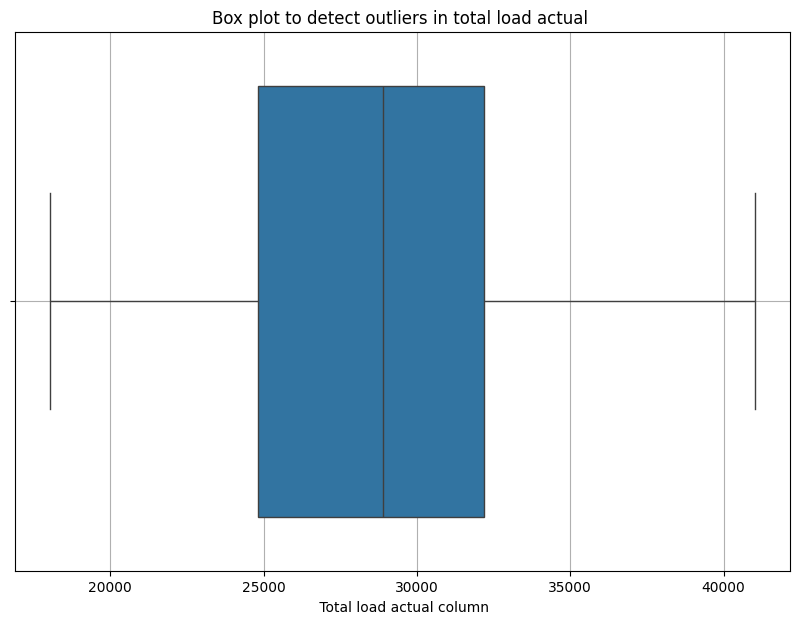

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
sns.boxplot(x=merged_df['total load actual'])
plt.title("Box plot to detect outliers in total load actual ")
plt.xlabel(" Total load actual column")
plt.grid(True)
plt.show()

FOR PRICE ACTUAL OUTLIER DETECTION AND VISUALIZATION

In [ ]:

                                              #OUTLIER DETECTION

#The Interquartile Range (IQR) is a robust statistical measure of variability used to identify outliers in a dataset.
###The IQR method uses thresholds to define outlier boundaries:
###Lower whisker: Q1 - 1.5 * IQR
###Upper whisker: Q3 + 1.5 * IQR
###Data points below the lower whisker or above the upper whisker are considered potential outliers.


Q1 = merged_df.copy()['price actual'].quantile(0.25)
Q3 = merged_df.copy()['price actual'].quantile(0.75)
IQR = Q3 - Q1


lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


outliers = merged_df.copy()[(merged_df.copy()['price actual'] < lower_bound) | (merged_df.copy()['price actual'] > upper_bound)]
print(f"Number of outliers: {len(outliers)}")


Number of outliers: 699


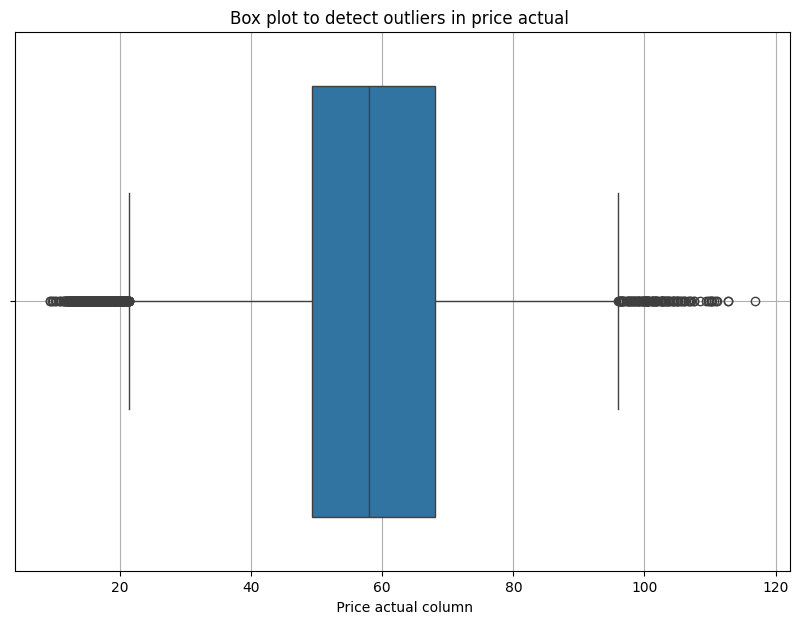

(35064, 36)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
sns.boxplot(x=merged_df['price actual'])
plt.title("Box plot to detect outliers in price actual ")
plt.xlabel(" Price actual column")
plt.grid(True)
plt.show()
merged_df.shape

MISSING VALUE IMPUTATION WITH FORWARD FILL FOLLOWED BY BACKWARD FILL

In [ ]:

def impute_and_ffillbfill(df):
  """
  Imputes missing values and performs forward fill (ffill) in a DataFrame.

  Args:
      df (pandas.DataFrame): The DataFrame to process.

  Returns:
      pandas.DataFrame: The DataFrame with missing values imputed and forward filled.
  """
  # Impute missing values (can be customized based on data type and4 needs)
  df = df.fillna(method='ffill')  # Forward fill all missing values
  df = df.fillna(method='bfill')  # Backward fill all missing values remaining after the forward fill as forward fill can still leave empty rows due to missing values in the very beginning, all missing values in a row or gaps between missing value clusters


  return df


merged_df = impute_and_ffillbfill(merged_df)
merged_df.shape

(35064, 36)

**EXPLORATORY DATA ANALYSIS**

CORRELATION MATRIX TO UNDERSTAND RELATIONSHIP BETWEEN WEATHER VARIABLES

Correlation Matrix:
                       temp  humidity  wind_speed  wind_deg  total load actual  price actual
temp               1.000000 -0.674630    0.100628 -0.115236           0.203489      0.080356
humidity          -0.674630  1.000000   -0.341188  0.020164          -0.366059     -0.039439
wind_speed         0.100628 -0.341188    1.000000  0.361267           0.194858     -0.225336
wind_deg          -0.115236  0.020164    0.361267  1.000000          -0.085287     -0.203741
total load actual  0.203489 -0.366059    0.194858 -0.085287           1.000000      0.435573
price actual       0.080356 -0.039439   -0.225336 -0.203741           0.435573      1.000000


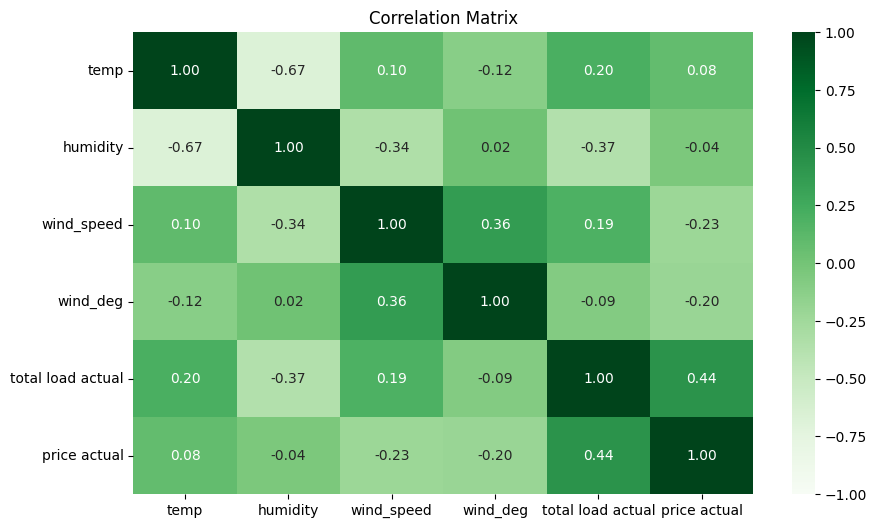

(35064, 36)

In [ ]:

import seaborn as sns  # Import seaborn for better heatmap visualization
import pandas as pd

# Specify the columns to include
columns_to_visualize = ['temp', 'humidity', 'pressure', 'wind_speed','wind_deg','snow_3h', 'rain_1h','rain_3h','clouds_all', 'total load actual', 'price actual']

def print_correlation_matrix(df, columns):
  """
  Prints the correlation matrix for a subset of columns in a DataFrame.

  Args:
      df (pandas.DataFrame): The DataFrame containing the columns.
      columns (list): A list of column names to include in the correlation matrix.
  """

  # Create a correlation matrix for the specified columns
  correlation_matrix = df[columns].corr()

  # Print the correlation matrix with clear formatting
  print("Correlation Matrix:")
  print(correlation_matrix.to_string())
# Specify the columns to include
columns_to_visualize = ['temp', 'humidity', 'wind_speed','wind_deg', 'total load actual', 'price actual']

# Apply the function to DataFrame
print_correlation_matrix(merged_df.copy(), columns_to_visualize)

def visualize_correlation_matrix(df, columns):
  """
  Visualizes the correlation matrix for a subset of columns in a DataFrame with all values printed.

  Args:
      df (pandas.DataFrame): The DataFrame containing the columns.
      columns (list): A list of column names to include in the correlation matrix.
  """

  # Create a correlation matrix for the specified columns
  correlation_matrix = df[columns].corr()

  # Create a heatmap using seaborn with all annotations
  plt.figure(figsize=(10, 6))
  sns.heatmap(correlation_matrix, annot=True, cmap='Greens', fmt='.2f',cbar='True',vmin=-1, vmax=1)  # Set value range for colormap
  plt.title('Correlation Matrix')
  plt.show()


# Apply the function to DataFrame
visualize_correlation_matrix(merged_df.copy(), columns_to_visualize)
merged_df.shape

CORRELATION MATRIX TO UNDERSTAND RELATIONSHIP BETWEEN ENERGY VARIABLES

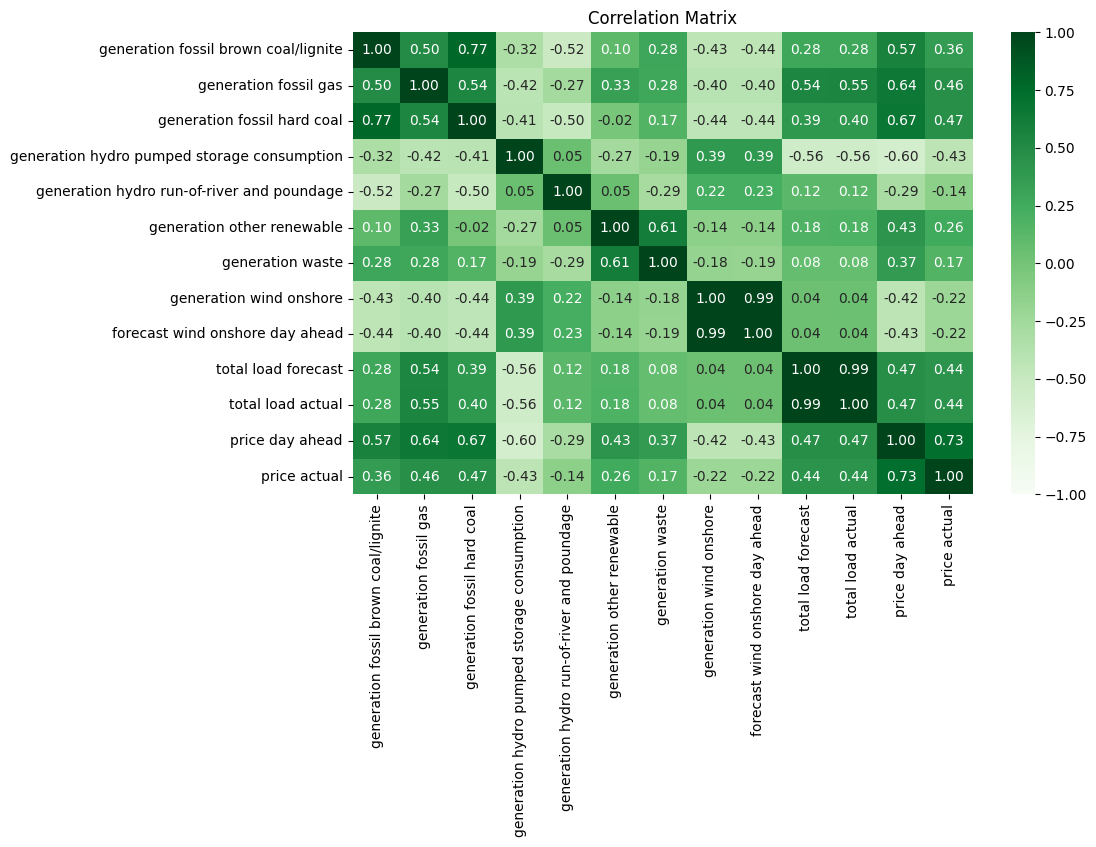

In [ ]:
import seaborn as sns  # Import seaborn for better heatmap visualization
import pandas as pd

# Specify the columns to include
columns_to_visualize = ['generation fossil brown coal/lignite' ,'generation fossil gas', 'generation fossil hard coal','generation hydro pumped storage consumption', 'generation hydro run-of-river and poundage','generation other renewable','generation waste' ,'generation wind onshore','forecast wind onshore day ahead' ,'total load forecast' ,'total load actual','price day ahead','price actual']

def visualize_correlation_matrix(df, columns):
  """
  Visualizes the correlation matrix for a subset of columns in a DataFrame with all values printed.

  Args:
      df (pandas.DataFrame): The DataFrame containing the columns.
      columns (list): A list of column names to include in the correlation matrix.
  """

  # Create a correlation matrix for the specified columns
  correlation_matrix = df[columns].corr()

  # Create a heatmap using seaborn with all annotations
  plt.figure(figsize=(10, 6))
  sns.heatmap(correlation_matrix, annot=True, cmap='Greens', fmt='.2f',cbar='True',vmin=-1, vmax=1)  # Set value range for colormap
  plt.title('Correlation Matrix')
  plt.show()


# Apply the function to  DataFrame
visualize_correlation_matrix(merged_df.copy(), columns_to_visualize)


**FEATURE ENGINEERING AND VISUALIZATION**

GENERATING PEAK AND NON PEAK HOURS AND VISUALIZATION

In [ ]:

def find_peak_non_peak(df, datetime_col, demand_col, price_col, peak_threshold=0.8):
  """
  Identifies peak and non-peak hours based on electricity demand and price.

  Args:
      df (pandas.DataFrame): The DataFrame containing datetime, demand, and price data.
      datetime_col (str): The name of the datetime column.
      demand_col (str): The name of the demand column.
      price_col (str): The name of the price column.
      peak_threshold (float, optional): The threshold for peak demand (proportion of max demand). Defaults to 0.8.

  Returns:
      pandas.DataFrame: A new DataFrame with additional columns for peak/non-peak hours.
  """
  df['hour'] = pd.to_datetime(df[datetime_col]).dt.hour

  # Calculate daily maximum demand and apply threshold
  df['max_demand_daily'] = df.groupby(df['hour'])[demand_col].transform(max)
  df['peak_hour'] = df[demand_col] >= df['max_demand_daily'] * peak_threshold

  #Analyze price during peak hours
  df['peak_price'] = df[price_col] * df['peak_hour']  # Price during peak hours


  return df

merged_df= find_peak_non_peak(merged_df.copy(), 'time', 'total load actual', 'price actual')

merged_df.shape

(35064, 40)

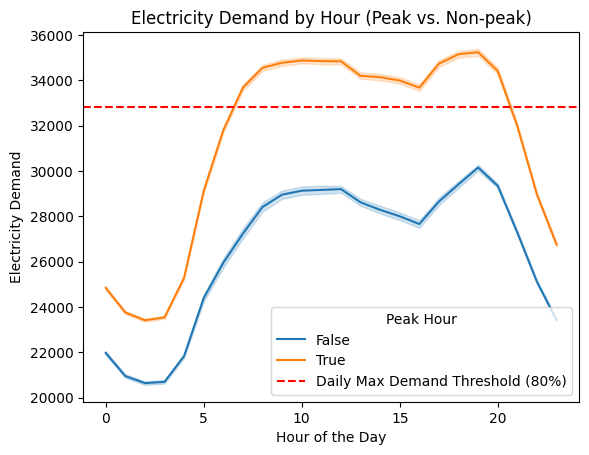

In [ ]:



sns.lineplot(x='hour', y='total load actual', hue='peak_hour', data=merged_df)
plt.axhline(y=merged_df['max_demand_daily'].max() * 0.8, color='red', linestyle='--', label='Daily Max Demand Threshold (80%)')  # Adjust threshold as needed
plt.xlabel('Hour of the Day')
plt.ylabel('Electricity Demand')
plt.title('Electricity Demand by Hour (Peak vs. Non-peak)')
plt.legend(title='Peak Hour')
plt.show()




GENERATING DEMANDS BASED ON EACH DAY OF WEEK AND VISUALIZATION- MAXIMUM DEMAND SEEN ON WEDNESDAY AND TUESDAY

<ipython-input-23-050bee4a9dfa>:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=merged_df['day_of_week_name'], y=merged_df['day_of_week_demand'], palette='Set2')  # Set a categorical color palette


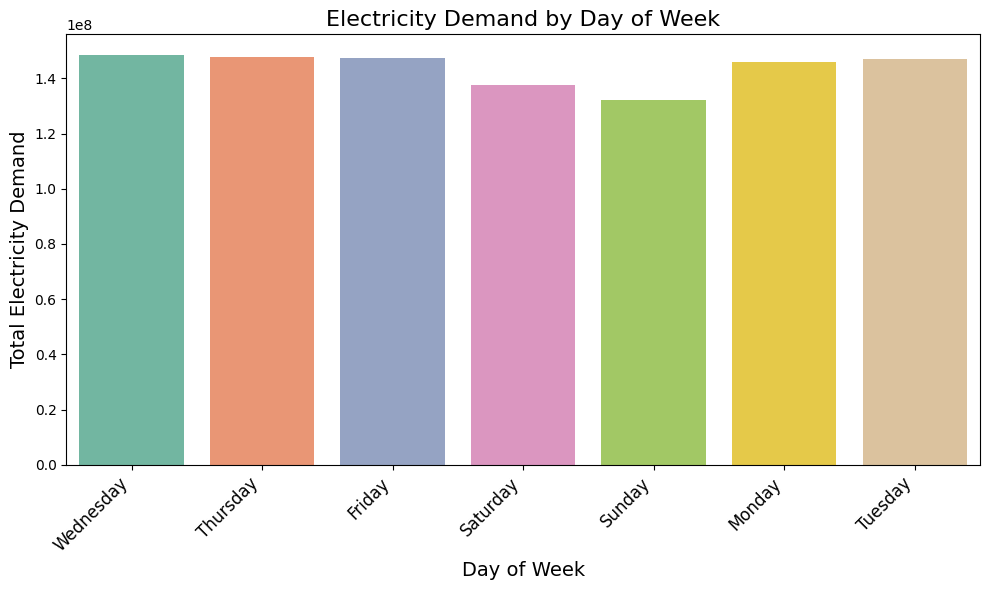

(35064, 43)

In [ ]:


def add_day_of_week_demand(df, datetime_col, demand_col):
  """
  Calculates electricity demand for each day of the week and adds it as a new column to the DataFrame.

  Args:
      df (pandas.DataFrame): The DataFrame containing datetime and demand data.
      datetime_col (str): The name of the datetime column.
      demand_col (str): The name of the demand column.

  Returns:
      pandas.DataFrame: The original DataFrame with a new column for day-of-week demand.
  """
  df['day_of_week'] = pd.to_datetime(df[datetime_col]).dt.dayofweek
  day_of_week_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
  df['day_of_week_name'] = df['day_of_week'].apply(lambda x: day_of_week_names[x])
  daily_demand = df.groupby('day_of_week_name')[demand_col].sum()
  df['day_of_week_demand'] = df['day_of_week_name'].apply(lambda x: daily_demand.get(x))

  return df



merged_df= add_day_of_week_demand(merged_df.copy(), 'time', 'total load actual')


# Data Visualization (Day of Week Demand)


plt.figure(figsize=(10, 6))

# Create bar chart with clear labels
sns.barplot(x=merged_df['day_of_week_name'], y=merged_df['day_of_week_demand'], palette='Set2')  # Set a categorical color palette

# Customize x-axis labels for readability and prevent overlapping
plt.xlabel('Day of Week', fontsize=14)
plt.ylabel('Total Electricity Demand', fontsize=14)
plt.title('Electricity Demand by Day of Week', fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.tight_layout()

# Display the plot
plt.show()
merged_df.shape


GENERATING DEMAND ON WEEKDAYS AND WEEKENDS AND VISUALIZATION- MORE DEMAND SEEN ON WEEKDAYS

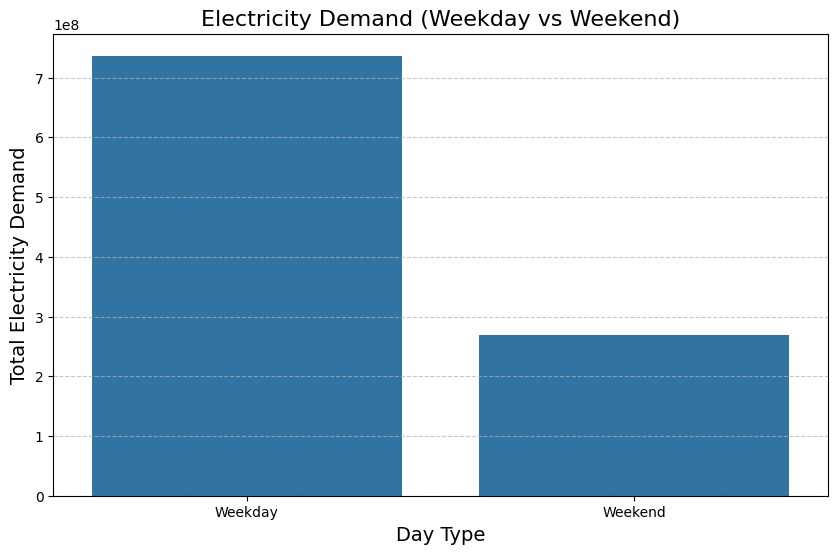

(35064, 45)

In [ ]:

def add_day_type_demand(df, datetime_col, demand_col):
  """
  Calculates electricity demand for weekdays and weekends and adds it as a new column to the DataFrame.

  Args:
      df (pandas.DataFrame): The DataFrame containing datetime and demand data.
      datetime_col (str): The name of the datetime column.
      demand_col (str): The name of the demand column.

  Returns:
      pandas.DataFrame: The original DataFrame with a new column for weekday/weekend demand.
  """
  df['day_of_week'] = pd.to_datetime(df[datetime_col]).dt.dayofweek
  is_weekend = df['day_of_week'].isin([5, 6])  # Weekends are Saturday (5) and Sunday (6)
  df['day_type'] = df['day_of_week'].apply(lambda x: 'Weekend' if x in [5, 6] else 'Weekday')
  daily_demand = df.groupby('day_type')[demand_col].sum()
  df['day_type_demand'] = df['day_type'].apply(lambda x: daily_demand.get(x))

  return df


merged_df= add_day_type_demand(merged_df.copy(), 'time', 'total load actual')


# Data Visualization (Weekday vs Weekend Demand)


plt.figure(figsize=(10, 6))

# Create a bar chart with clear labels
sns.barplot(x='day_type', y='day_type_demand', data=merged_df)

# Customize labels, title, and gridlines
plt.xlabel('Day Type', fontsize=14)
plt.ylabel('Total Electricity Demand', fontsize=14)
plt.title('Electricity Demand (Weekday vs Weekend)', fontsize=16)
plt.xticks(rotation=0)  # No rotation for horizontal bar chart
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add vertical gridlines with dashed style

# Display the plot
plt.show()

merged_df.shape

GENERATING SEASONAL DEMANDS

In [ ]:
import pandas as pd

def create_seasons_column_spain(df, datetime_column_name):
  """
  Extracts a new column named "seasons" based on month for cities in Spain.

  Args:
      df (pandas.DataFrame): The DataFrame containing the datetime column.
      datetime_column_name (str): The name of the column containing datetime data.

  Returns:
      pandas.DataFrame: The modified DataFrame with a new "seasons" column.
  """

  # Extract month as an integer (1-12)
  df['month'] = df[datetime_column_name].dt.month

  # Define season mapping
  season_mapping = {
      1: 'Winter',
      2: 'Winter',
      3: 'Spring',
      4: 'Spring',
      5: 'Spring',
      6: 'Summer',
      7: 'Summer',
      8: 'Summer',
      9: 'Autumn',
      10: 'Autumn',
      11: 'Autumn',
      12: 'Winter'
  }

  # Create the "seasons" column based on month and mapping
  df['seasons'] = df['month'].map(season_mapping)



  return df

# Apply the function to DataFrame
merged_df = create_seasons_column_spain(merged_df.copy(), 'time')
merged_df.shape


(35064, 47)

VISUALIZE SEASONAL DEMANDS- HIGHEST DEMANDS SEEN IN SUMMER AND WINTER

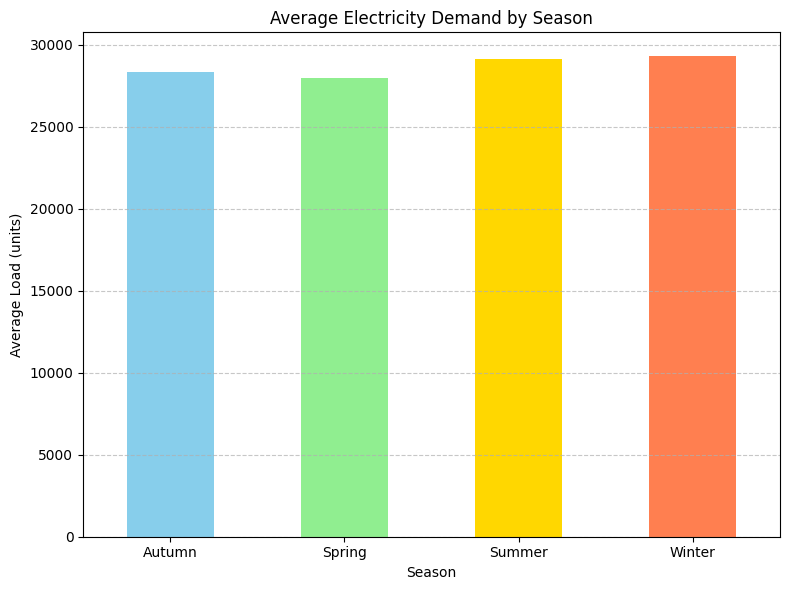

In [ ]:


# Group data by seasons (
seasonal_demand = merged_df.groupby('seasons')['total load actual'].mean()

# Create a bar chart
plt.figure(figsize=(8, 6))
seasonal_demand.plot(kind='bar', color=['skyblue', 'lightgreen', 'gold', 'coral'])
plt.title('Average Electricity Demand by Season')
plt.xlabel('Season')
plt.ylabel('Average Load (units)')
plt.xticks(rotation=0)  # Rotate x-axis labels for readability
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add grid lines for better visualization
plt.tight_layout()
plt.show()




GENERATING MONTHLY DEMAND

In [ ]:

import pandas as pd



def add_monthly_demand_price(df, datetime_column_name, demand_column_name, price_column_name):
  """
  Adds separate columns for monthly average demand and price (month names as strings) to a DataFrame (custom calculation).

  Args:
      df (pandas.DataFrame): The DataFrame containing the data.
      datetime_column_name (str): The name of the column containing datetime data.
      demand_column_name (str): The name of the column containing electricity demand data.
      price_column_name (str): The name of the column containing electricity price data.

  Returns:
      pandas.DataFrame: The DataFrame with added monthly columns (month names as strings).
  """

  # Extract month names as strings
  df['month_name'] = df[datetime_column_name].dt.month_name()

  # Calculate monthly average demand and price using loops or vectorized operations (consider efficiency for large datasets)
  for month in df['month_name'].unique():
    df[f'demand_{month}'] = df[df['month_name'] == month][demand_column_name].mean()
    df[f'price_{month}'] = df[df['month_name'] == month][price_column_name].mean()

  # Drop the temporary 'month_name' column (optional)
  # df.drop('month_name', axis=1, inplace=True)

  return df

# Apply the function to your DataFrame
merged_df = add_monthly_demand_price(merged_df.copy(), 'time', 'total load actual', 'price actual')
merged_df.shape

(35064, 72)

VISUALIZATION OF MONTHLY DEMAND- HIGHEST DEMAND IN JULY AND HIGHEST PRICE IN DECEMBER

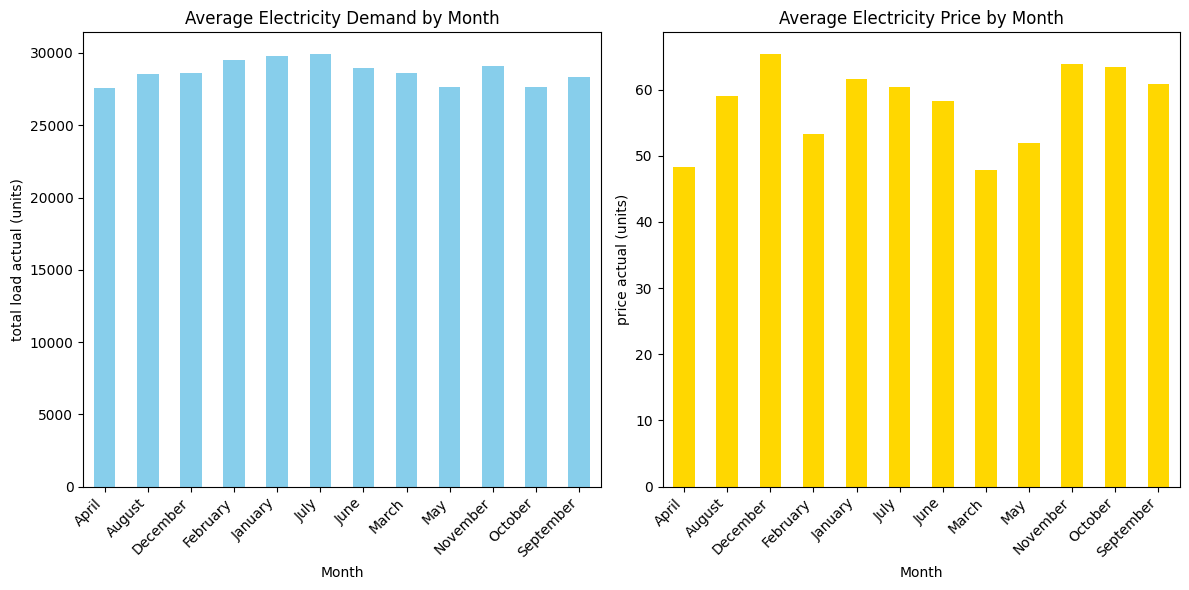

(35064, 72)

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt

def visualize_monthly_demand_price(df, datetime_column_name, demand_column_name, price_column_name):
  """
  Visualizes electricity demand and price variations by month using bar charts.

  Args:
      df (pandas.DataFrame): The DataFrame containing the data.
      datetime_column_name (str): The name of the column containing datetime data.
      demand_column_name (str): The name of the column containing electricity demand data.
      price_column_name (str): The name of the column containing electricity price data.
  """

  # Extract month names as strings (January, February, etc.)
  df['month_name'] = df[datetime_column_name].dt.month_name()

  # Group data by month
  monthly_data = df.groupby('month_name')[
      [demand_column_name, price_column_name]].mean()

  # Create separate bar charts for demand and price
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

  # Bar chart for demand
  monthly_data[demand_column_name].plot(kind='bar', color='skyblue', ax=ax1)
  ax1.set_title('Average Electricity Demand by Month')
  ax1.set_xlabel('Month')
  ax1.set_ylabel(demand_column_name + ' (units)')
  ax1.set_xticks(range(len(monthly_data)))  # Set x-axis ticks for month positions
  ax1.set_xticklabels(monthly_data.index, rotation=45, ha='right')  # Rotate and align month labels

  # Bar chart for price
  monthly_data[price_column_name].plot(kind='bar', color='gold', ax=ax2)
  ax2.set_title('Average Electricity Price by Month')
  ax2.set_xlabel('Month')
  ax2.set_ylabel(price_column_name + ' (units)')
  ax2.set_xticks(range(len(monthly_data)))
  ax2.set_xticklabels(monthly_data.index, rotation=45, ha='right')

  plt.tight_layout()
  plt.show()

# Apply the function to your DataFrame
visualize_monthly_demand_price(merged_df.copy(), 'time', 'total load actual', 'price actual')
merged_df.shape

ONE HOT ENCODING THE DATASET- ENCODING CATEGORICAL COLOUMNS. NEW DATASET IS encoded_df

In [ ]:
import pandas as pd


df = merged_df.copy()

def identify_categorical_columns(df):
    """
    Identifies columns containing categorical data in a DataFrame.

    Args:
        df (pandas.DataFrame): The DataFrame to analyze.

    Returns:
        list: A list of column names containing categorical data.
    """
    categorical_cols = [col for col in df.columns if df[col].dtype == 'object' or df[col].nunique() < 10]
    return categorical_cols

# Identify categorical columns
categorical_cols = identify_categorical_columns(df)

# Apply one-hot encoding
encoded_df = pd.get_dummies(df, columns=categorical_cols)

# Debugging output
print("Original DataFrame shape:", df.shape)
print("Encoded DataFrame shape:", encoded_df.shape)
print(encoded_df.head())  # Display the first few rows of the modified DataFrame
encoded_df.shape

Original DataFrame shape: (35064, 72)
Encoded DataFrame shape: (35064, 155)
                 time  generation biomass  \
0 2014-12-31 23:00:00               447.0   
1 2015-01-01 00:00:00               449.0   
2 2015-01-01 01:00:00               448.0   
3 2015-01-01 02:00:00               438.0   
4 2015-01-01 03:00:00               428.0   

   generation fossil brown coal/lignite  generation fossil gas  \
0                                 329.0                 4844.0   
1                                 328.0                 5196.0   
2                                 323.0                 4857.0   
3                                 254.0                 4314.0   
4                                 187.0                 4130.0   

   generation fossil hard coal  generation fossil oil  \
0                       4821.0                  162.0   
1                       4755.0                  158.0   
2                       4581.0                  157.0   
3                       4131

(35064, 155)

**FEATURE SELECTION**- SELECTING FEATURE SETS FOR TARGET VARIABLES 'total load actual' AND 'price actual'. WE ONLY SELECT FEATURES WITH CORRELATION COEFFICIENT GREATER THAN AND EQUAL TO 0.05


In [ ]:
import pandas as pd

def select_features_by_correlation(df, target_variable, threshold=0.05 ):
    """
    Selects features from the dataframe that have an absolute correlation
    coefficient greater than the given threshold with the target variable.

    Parameters:
1    - df: DataFrame containing the features and target variable.
    - target_variable: The target variable column name as a string.
    - threshold: The absolute correlation threshold. Default is 0.1.

    Returns:
    - selected_features: List of feature names that meet the correlation criteria.
    """
    # Calculate the correlation matrix
    corr_matrix = df.corr()

    # Get the correlations with the target variable
    target_corr = corr_matrix[target_variable].drop(target_variable)

    # Select features with absolute correlation greater than the threshold
    selected_features = target_corr[abs(target_corr) > threshold].index.tolist()

    return selected_features



# Select features for 'total load actual'
selected_features_total_load = select_features_by_correlation(encoded_df, 'total load actual')

# Select features for 'price actual'
selected_features_price_actual = select_features_by_correlation(encoded_df, 'price actual')

print("Selected features for 'total load actual':", selected_features_total_load)
print("Selected features for 'price actual':", selected_features_price_actual)


Selected features for 'total load actual': ['generation biomass', 'generation fossil brown coal/lignite', 'generation fossil gas', 'generation fossil hard coal', 'generation fossil oil', 'generation hydro pumped storage consumption', 'generation hydro run-of-river and poundage', 'generation hydro water reservoir', 'generation nuclear', 'generation other', 'generation other renewable', 'generation solar', 'generation waste', 'forecast solar day ahead', 'total load forecast', 'price day ahead', 'price actual', 'temp', 'temp_min', 'temp_max', 'humidity', 'wind_speed', 'wind_deg', 'hour', 'max_demand_daily', 'peak_price', 'weather_main_clear', 'weather_main_clouds', 'weather_description_few clouds', 'weather_description_sky is clear', 'weather_icon_01d', 'weather_icon_01n', 'weather_icon_02d', 'weather_icon_02n', 'weather_icon_03d', 'weather_icon_03n', 'weather_icon_04d', 'weather_icon_04n', 'weather_icon_10d', 'weather_icon_10n', 'weather_icon_50n', 'peak_hour_False', 'peak_hour_True', 'd

**DIVIDING THE DATASET INTO TRAINING, VALIDATION AND TEST DATASET** IN 60:20:20 RATIO WITH DIFFERENT FEATURE SETS FOR LOAD AND PRICE TARGET VARIABLES

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


# Set the index to the 'time' column
encoded_df['time'] = pd.to_datetime(encoded_df['time'])
encoded_df.set_index('time', inplace=True)



def split_data(df, features_dict, target_col, test_size=0.2, val_size=0.2, random_state=42):
    """
    Splits a DataFrame into training, validation, and test sets for a given target variable,
    while extracting time information as separate variables.

    Args:
        df (pandas.DataFrame): The DataFrame to split.
        features_dict (dict): A dictionary where keys are target variables and values are lists of feature columns.
        target_col (str): The column name of the target variable.
        test_size (float, optional): Proportion of data for the test set. Defaults to 0.2.
        val_size (float, optional): Proportion of data for the validation set. Defaults to 0.2.
        random_state (int, optional): Random seed for splitting. Defaults to 42.

    Returns:
        tuple: A tuple containing the training, validation, and test DataFrames for features and the target,
               as well as separate time variables for each split.
    """
    # Feature matrix for the specific target variable
    X = df[features_dict[target_col]]

    # Extract target variable as a DataFrame
    y = df[target_col]

    # Extract time information: year and month
    time_indices = df.index

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test, time_train, time_test = train_test_split(
        X, y, time_indices, test_size=test_size, random_state=random_state
    )

    # Further split training data into training and validation sets
    val_size_adj = val_size / (1 - test_size)  # Adjust validation size relative to the remaining data
    X_train, X_val, y_train, y_val, time_train, time_val = train_test_split(
        X_train, y_train, time_train, test_size=val_size_adj, random_state=random_state
    )

    # Debugging prints
    print("Train time range:", time_train.min(), "to", time_train.max())
    print("Validation time range:", time_val.min(), "to", time_val.max())
    print("Test time range:", time_test.min(), "to", time_test.max())

    return (
        X_train, X_val, X_test,
        y_train, y_val, y_test,
        time_train, time_val, time_test
    )

# Define the feature sets for each target variable
features_dict = {
    'total load actual': ['generation biomass', 'generation fossil brown coal/lignite', 'generation fossil gas', 'generation fossil hard coal', 'generation fossil oil', 'generation hydro pumped storage consumption', 'generation hydro run-of-river and poundage', 'generation hydro water reservoir', 'generation nuclear', 'generation other', 'generation other renewable', 'generation solar', 'generation waste', 'forecast solar day ahead', 'price day ahead', 'price actual', 'temp', 'temp_min', 'temp_max', 'humidity', 'wind_speed', 'wind_deg', 'hour', 'max_demand_daily', 'peak_price', 'weather_main_clear', 'weather_main_clouds', 'weather_description_few clouds', 'weather_description_sky is clear', 'weather_icon_01d', 'weather_icon_01n', 'weather_icon_02d', 'weather_icon_02n', 'weather_icon_03d', 'weather_icon_03n', 'weather_icon_04d', 'weather_icon_04n', 'weather_icon_10d', 'weather_icon_10n', 'weather_icon_50n', 'peak_hour_False', 'peak_hour_True', 'day_of_week_1', 'day_of_week_2', 'day_of_week_3', 'day_of_week_4', 'day_of_week_5', 'day_of_week_6', 'day_of_week_name_Friday', 'day_of_week_name_Saturday', 'day_of_week_name_Sunday', 'day_of_week_name_Thursday', 'day_of_week_name_Tuesday', 'day_of_week_name_Wednesday', 'day_of_week_demand_132181626.0', 'day_of_week_demand_137514935.0', 'day_of_week_demand_147102655.0', 'day_of_week_demand_147209054.0', 'day_of_week_demand_147722096.0', 'day_of_week_demand_148490390.0', 'day_type_Weekday', 'day_type_Weekend', 'day_type_demand_269696561.0', 'day_type_demand_736556386.0', 'seasons_Spring', 'seasons_Summer', 'seasons_Winter', 'month_name_April', 'month_name_February', 'month_name_January', 'month_name_July', 'month_name_May', 'month_name_October'],

    'price actual': ['generation biomass', 'generation fossil brown coal/lignite', 'generation fossil gas', 'generation fossil hard coal', 'generation fossil oil', 'generation hydro pumped storage consumption', 'generation hydro run-of-river and poundage', 'generation hydro water reservoir', 'generation nuclear', 'generation other', 'generation other renewable', 'generation solar', 'generation waste', 'generation wind onshore', 'forecast solar day ahead', 'forecast wind onshore day ahead', 'total load forecast', 'total load actual', 'temp', 'temp_min', 'temp_max', 'wind_speed', 'wind_deg', 'rain_1h', 'clouds_all', 'weather_id', 'hour', 'max_demand_daily', 'month', 'weather_main_clear', 'weather_main_clouds', 'weather_description_sky is clear', 'weather_icon_2', 'weather_icon_01d', 'weather_icon_01n', 'weather_icon_02n', 'peak_hour_False', 'peak_hour_True', 'day_of_week_1', 'day_of_week_2', 'day_of_week_3', 'day_of_week_4', 'day_of_week_5', 'day_of_week_6', 'day_of_week_name_Friday', 'day_of_week_name_Saturday', 'day_of_week_name_Sunday', 'day_of_week_name_Thursday', 'day_of_week_name_Tuesday', 'day_of_week_name_Wednesday', 'day_of_week_demand_132181626.0', 'day_of_week_demand_137514935.0', 'day_of_week_demand_147102655.0', 'day_of_week_demand_147209054.0', 'day_of_week_demand_147722096.0', 'day_of_week_demand_148490390.0', 'day_type_Weekday', 'day_type_Weekend', 'day_type_demand_269696561.0', 'day_type_demand_736556386.0', 'seasons_Autumn', 'seasons_Spring', 'seasons_Summer', 'seasons_Winter', 'month_name_April', 'month_name_December', 'month_name_February', 'month_name_January', 'month_name_July', 'month_name_March', 'month_name_May', 'month_name_November', 'month_name_October', 'month_name_September']
}

# Apply the function to split the data for 'total load actual'
X_train_tl, X_val_tl, X_test_tl, y_train_tl, y_val_tl, y_test_tl, time_train_tl, time_val_tl, time_test_tl = split_data(
    encoded_df.copy(), features_dict, 'total load actual', test_size=0.2, val_size=0.2)

# Apply the function to split the data for 'price actual'
X_train_pa, X_val_pa, X_test_pa, y_train_pa, y_val_pa, y_test_pa, time_train_pa, time_val_pa, time_test_pa = split_data(
    encoded_df.copy(), features_dict, 'price actual', test_size=0.2, val_size=0.2)

# Print the shapes of the datasets
print("For 'total load actual'")
print(f"X_train_tl shape: {X_train_tl.shape}")
print(f"X_val_tl shape: {X_val_tl.shape}")
print(f"X_test_tl shape: {X_test_tl.shape}")
print(f"y_train_tl shape: {y_train_tl.shape}")
print(f"y_val_tl shape: {y_val_tl.shape}")
print(f"y_test_tl shape: {y_test_tl.shape}")
print("For 'price actual'")
print(f"X_train_pa shape: {X_train_pa.shape}")
print(f"X_val_pa shape: {X_val_pa.shape}")
print(f"X_test_pa shape: {X_test_pa.shape}")
print(f"y_train_pa shape: {y_train_pa.shape}")
print(f"y_val_pa shape: {y_val_pa.shape}")
print(f"y_test_pa shape: {y_test_pa.shape}")


Train time range: 2015-01-01 00:00:00 to 2018-12-31 22:00:00
Validation time range: 2014-12-31 23:00:00 to 2018-12-31 09:00:00
Test time range: 2015-01-01 03:00:00 to 2018-12-31 21:00:00
Train time range: 2015-01-01 00:00:00 to 2018-12-31 22:00:00
Validation time range: 2014-12-31 23:00:00 to 2018-12-31 09:00:00
Test time range: 2015-01-01 03:00:00 to 2018-12-31 21:00:00
For 'total load actual'
X_train_tl shape: (21038, 73)
X_val_tl shape: (7013, 73)
X_test_tl shape: (7013, 73)
y_train_tl shape: (21038,)
y_val_tl shape: (7013,)
y_test_tl shape: (7013,)
For 'price actual'
X_train_pa shape: (21038, 74)
X_val_pa shape: (7013, 74)
X_test_pa shape: (7013, 74)
y_train_pa shape: (21038,)
y_val_pa shape: (7013,)
y_test_pa shape: (7013,)


**BASIC LINEAR REGRESSION MODEL**

Metrics for Total Load Actual:
MAPE: 4.39%
R2: 0.88
Adjusted R2: 0.88
MAE: 1218.81
RMSE: 1550.38
Metrics for Price Actual:
MAPE: 14.96%
R2: 0.57
Adjusted R2: 0.56
MAE: 7.32
RMSE: 9.38


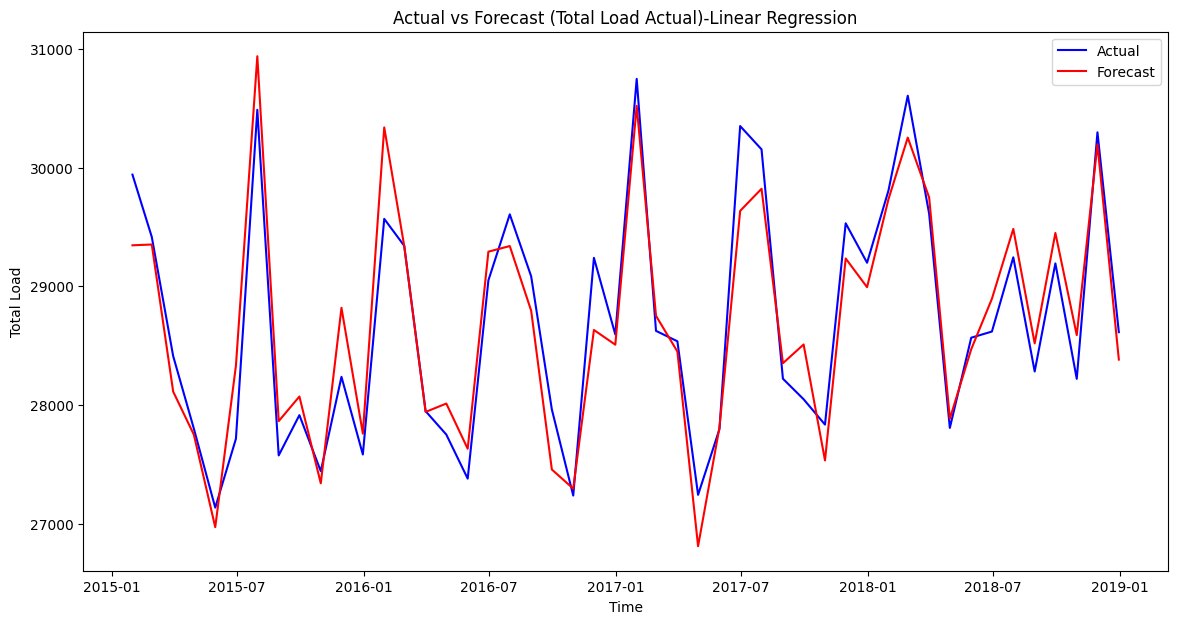

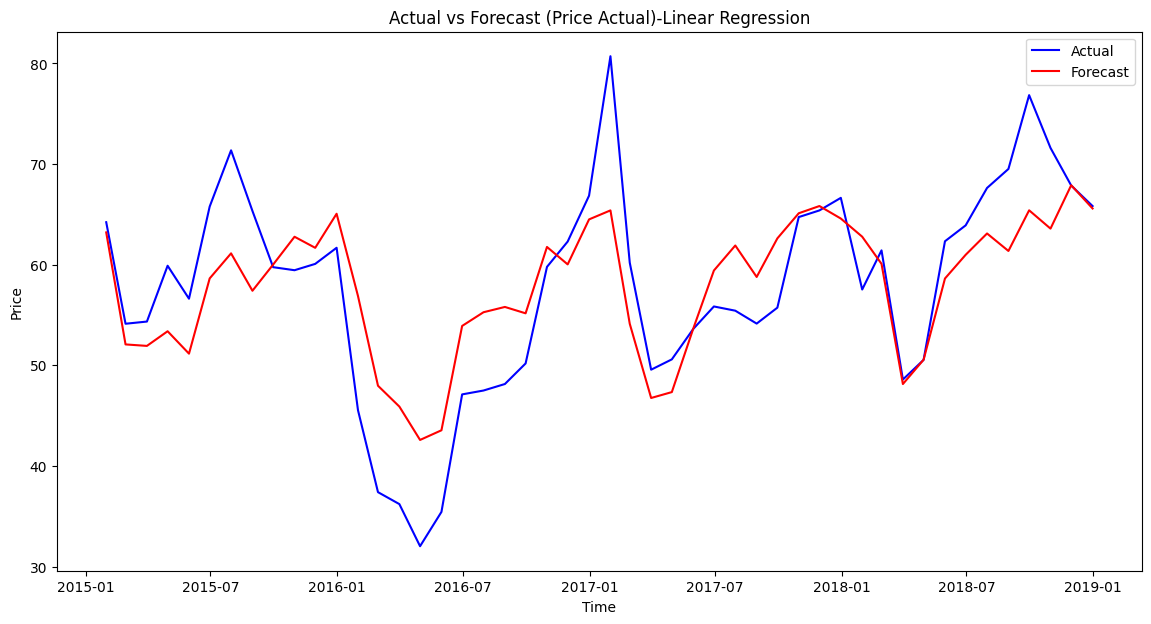

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error
import matplotlib.pyplot as plt

# Train linear regression models
lr_tl = LinearRegression()
lr_tl.fit(X_train_tl, y_train_tl)

lr_pa = LinearRegression()
lr_pa.fit(X_train_pa, y_train_pa)

# Make predictions
y_pred_test_tl = lr_tl.predict(X_test_tl)
y_pred_test_pa = lr_pa.predict(X_test_pa)

# Calculate error metrics
def calculate_metrics(actual, predicted, n, k):
    mae = mean_absolute_error(actual, predicted)
    mse = mean_squared_error(actual, predicted)
    rmse = np.sqrt(mse)
    r2 = r2_score(actual, predicted)
    adj_r2 = 1 - (1 - r2) * (n - 1) / (n - k - 1)
    mape = mean_absolute_percentage_error(actual, predicted) * 100  # Convert MAPE to percentage
    return mae, rmse, r2, adj_r2, mape

n_tl = len(y_test_tl)
k_tl = X_test_tl.shape[1]
metrics_tl = calculate_metrics(y_test_tl, y_pred_test_tl, n_tl, k_tl)

n_pa = len(y_test_pa)
k_pa = X_test_pa.shape[1]
metrics_pa = calculate_metrics(y_test_pa, y_pred_test_pa, n_pa, k_pa)

print("Metrics for Total Load Actual:")
print(f"MAPE: {metrics_tl[4]:.2f}%")
print(f"R2: {metrics_tl[2]:.2f}")
print(f"Adjusted R2: {metrics_tl[3]:.2f}")
print(f"MAE: {metrics_tl[0]:.2f}")
print(f"RMSE: {metrics_tl[1]:.2f}")

print("Metrics for Price Actual:")
print(f"MAPE: {metrics_pa[4]:.2f}%")
print(f"R2: {metrics_pa[2]:.2f}")
print(f"Adjusted R2: {metrics_pa[3]:.2f}")
print(f"MAE: {metrics_pa[0]:.2f}")
print(f"RMSE: {metrics_pa[1]:.2f}")

# Resample the actual and predicted values to monthly frequency
def resample_monthly(time_indices, actual, predicted):
    df = pd.DataFrame({
        'time': time_indices,
        'actual': actual,
        'predicted': predicted
    })
    df['time'] = pd.to_datetime(df['time'])
    df.set_index('time', inplace=True)
    df_resampled = df.resample('M').mean()
    return df_resampled

# Resample data
resampled_tl = resample_monthly(time_test_tl, y_test_tl, y_pred_test_tl)
resampled_pa = resample_monthly(time_test_pa, y_test_pa, y_pred_test_pa)

# Plot Actual vs Forecast
def plot_actual_vs_forecast(resampled_df, title, ylabel):
    plt.figure(figsize=(14, 7))
    plt.plot(resampled_df.index, resampled_df['actual'], label='Actual', color='blue')
    plt.plot(resampled_df.index, resampled_df['predicted'], label='Forecast', color='red')
    plt.title(title)
    plt.xlabel('Time')
    plt.ylabel(ylabel)
    plt.legend()
    plt.show()

# Plot results
plot_actual_vs_forecast(resampled_tl, 'Actual vs Forecast (Total Load Actual)-Linear Regression', 'Total Load')
plot_actual_vs_forecast(resampled_pa, 'Actual vs Forecast (Price Actual)-Linear Regression', 'Price')


**BASIC RANDOM FOREST MODEL**

Metrics for Total Load Actual using Random Forest:
MAPE: 2.65%
R2: 0.95
Adjusted R2: 0.95
MAE: 737.02
RMSE: 983.00
Metrics for Price Actual using Random Forest:
MAPE: 6.44%
R2: 0.90
Adjusted R2: 0.90
MAE: 3.14
RMSE: 4.56


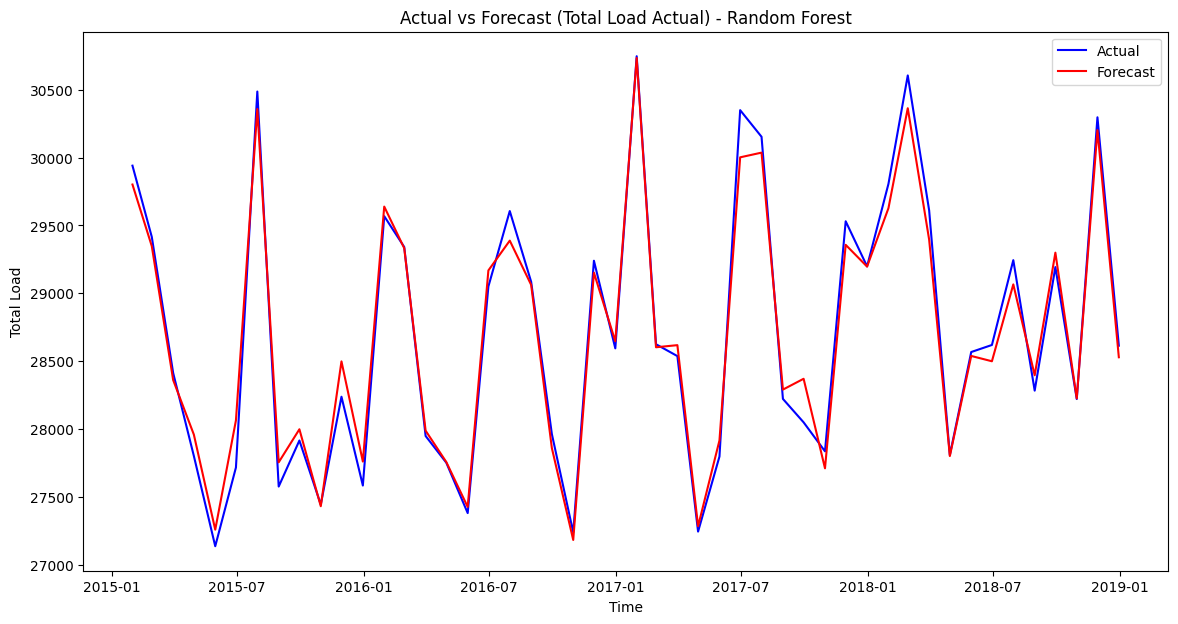

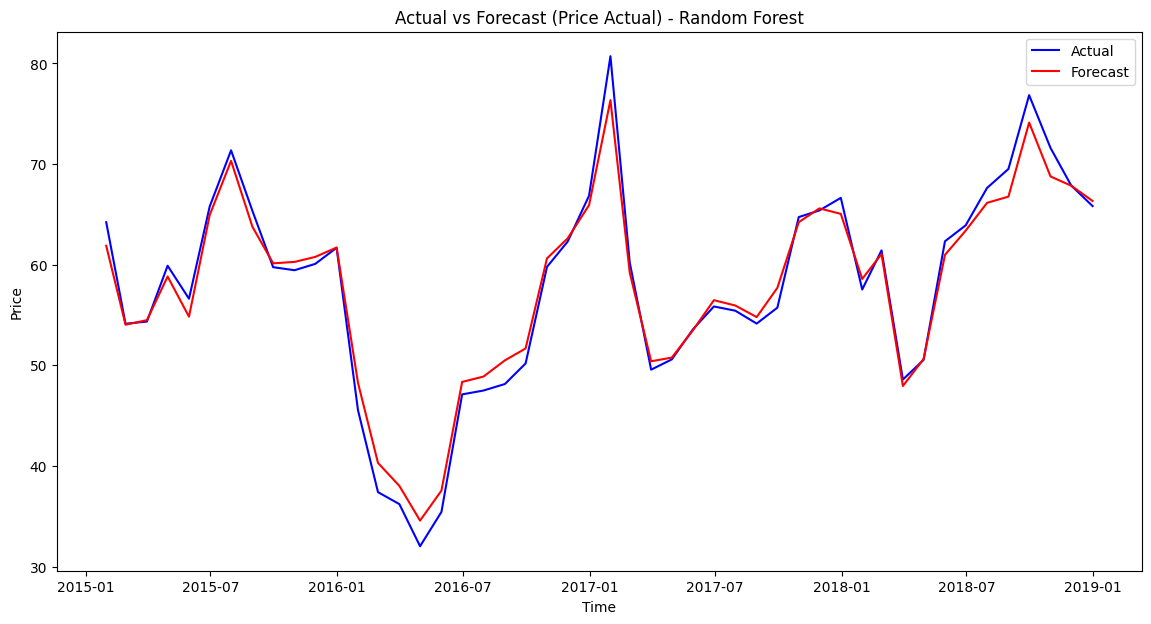

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Function to calculate Mean Absolute Percentage Error (MAPE)
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Function to calculate Adjusted R-squared
def adjusted_r2_score(r2, n, p):
    return 1 - (1 - r2) * (n - 1) / (n - p - 1)

# Initialize Random Forest model
model_rf_tl = RandomForestRegressor(n_estimators=100, random_state=42)
model_rf_pa = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model on the training data for 'total load actual'
model_rf_tl.fit(X_train_tl, y_train_tl)

# Train the model on the training data for 'price actual'
model_rf_pa.fit(X_train_pa, y_train_pa)

# Make predictions
y_pred_test_tl_rf = model_rf_tl.predict(X_test_tl)
y_pred_test_pa_rf = model_rf_pa.predict(X_test_pa)

# Calculate error metrics
def calculate_metrics(actual, predicted, n, k):
    mae = mean_absolute_error(actual, predicted)
    mse = mean_squared_error(actual, predicted)
    rmse = np.sqrt(mse)
    r2 = r2_score(actual, predicted)
    adj_r2 = 1 - (1 - r2) * (n - 1) / (n - k - 1)
    mape = mean_absolute_percentage_error(actual, predicted)
    return mae, rmse, r2, adj_r2, mape

n_tl_rf = len(y_test_tl)
k_tl_rf = X_test_tl.shape[1]
metrics_tl_rf = calculate_metrics(y_test_tl, y_pred_test_tl_rf, n_tl_rf, k_tl_rf)

n_pa_rf = len(y_test_pa)
k_pa_rf = X_test_pa.shape[1]
metrics_pa_rf = calculate_metrics(y_test_pa, y_pred_test_pa_rf, n_pa_rf, k_pa_rf)

print("Metrics for Total Load Actual using Random Forest:")
print(f"MAPE: {metrics_tl_rf[4]:.2f}%")
print(f"R2: {metrics_tl_rf[2]:.2f}")
print(f"Adjusted R2: {metrics_tl_rf[3]:.2f}")
print(f"MAE: {metrics_tl_rf[0]:.2f}")
print(f"RMSE: {metrics_tl_rf[1]:.2f}")

print("Metrics for Price Actual using Random Forest:")
print(f"MAPE: {metrics_pa_rf[4]:.2f}%")
print(f"R2: {metrics_pa_rf[2]:.2f}")
print(f"Adjusted R2: {metrics_pa_rf[3]:.2f}")
print(f"MAE: {metrics_pa_rf[0]:.2f}")
print(f"RMSE: {metrics_pa_rf[1]:.2f}")

# Resample the actual and predicted values to monthly frequency
def resample_monthly(time_indices, actual, predicted):
    df = pd.DataFrame({
        'time': time_indices,
        'actual': actual,
        'predicted': predicted
    })
    df['time'] = pd.to_datetime(df['time'])
    df.set_index('time', inplace=True)

    df_resampled = df.resample('M').mean()
    return df_resampled

# Resample data
resampled_tl_rf = resample_monthly(time_test_tl, y_test_tl, y_pred_test_tl_rf)
resampled_pa_rf = resample_monthly(time_test_pa, y_test_pa, y_pred_test_pa_rf)

# Plot Actual vs Forecast
def plot_actual_vs_forecast(resampled_df, title, ylabel):
    plt.figure(figsize=(14, 7))
    plt.plot(resampled_df.index, resampled_df['actual'], label='Actual', color='blue')
    plt.plot(resampled_df.index, resampled_df['predicted'], label='Forecast', color='red')
    plt.title(title)
    plt.xlabel('Time')
    plt.ylabel(ylabel)
    plt.legend()
    plt.show()

# Plot results
plot_actual_vs_forecast(resampled_tl_rf, 'Actual vs Forecast (Total Load Actual) - Random Forest', 'Total Load')
plot_actual_vs_forecast(resampled_pa_rf, 'Actual vs Forecast (Price Actual) - Random Forest', 'Price')


**BASIC GRADIENT BOOSTING MODEL**

Metrics for Total Load Actual using Gradient Boosting:
MAPE: 3.63%
R2: 0.92
Adjusted R2: 0.92
MAE: 1023.55
RMSE: 1303.02
Metrics for Price Actual using Gradient Boosting:
MAPE: 11.52%
R2: 0.73
Adjusted R2: 0.73
MAE: 5.63
RMSE: 7.36


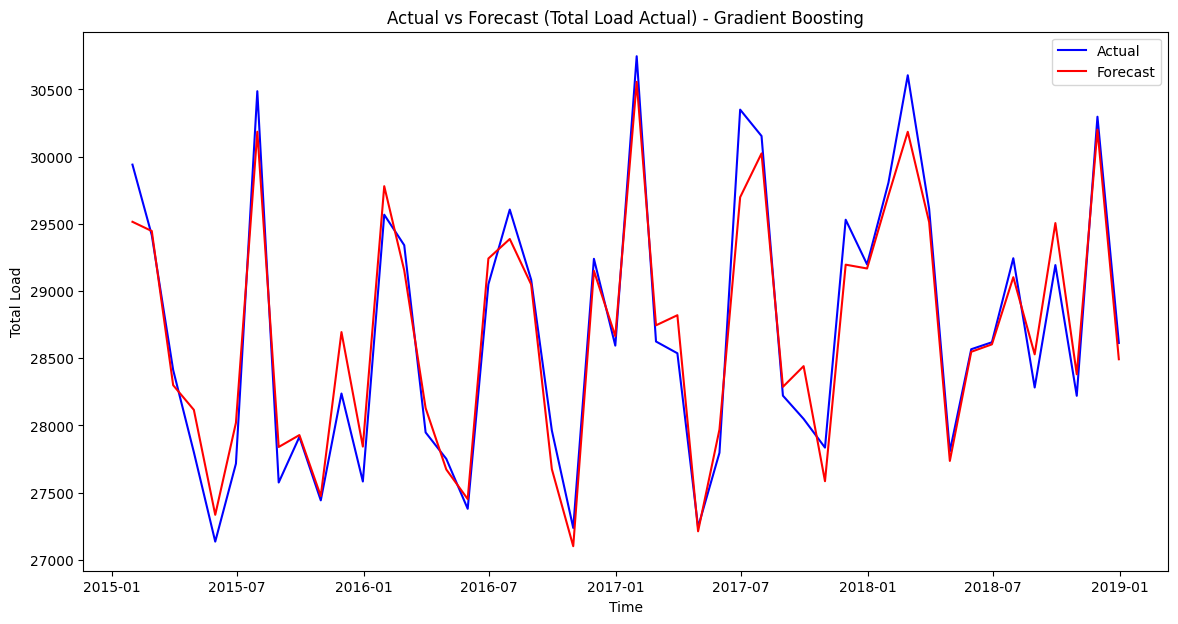

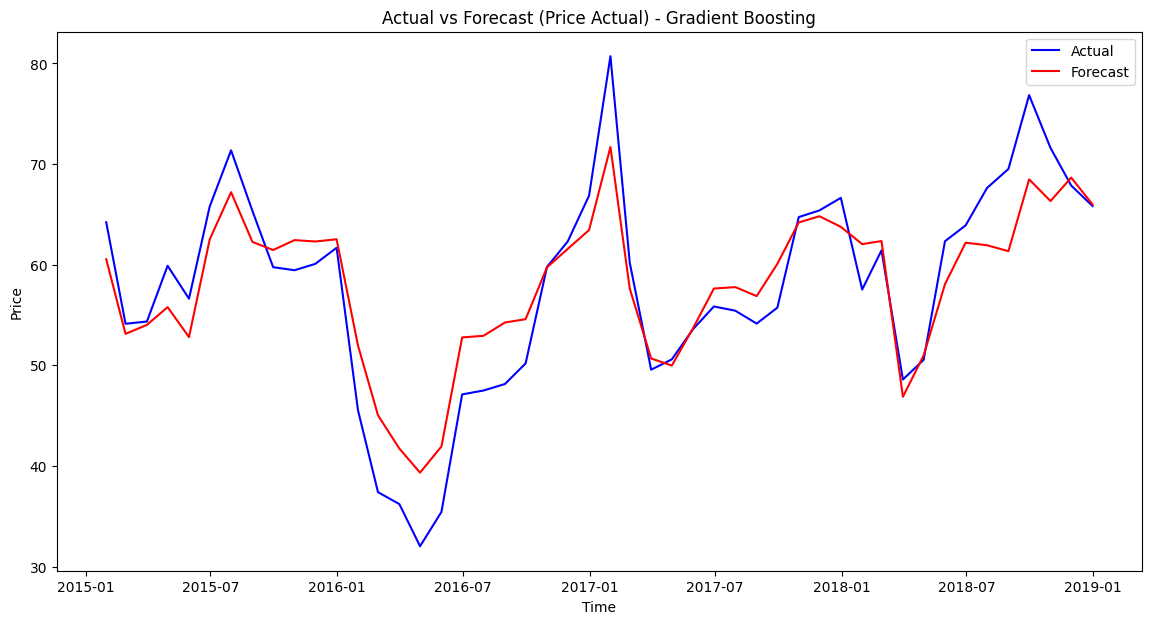

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Function to calculate Mean Absolute Percentage Error (MAPE)
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Function to calculate Adjusted R-squared
def adjusted_r2_score(r2, n, p):
    return 1 - (1 - r2) * (n - 1) / (n - p - 1)

# Initialize Gradient Boosting model
model_gb_tl = GradientBoostingRegressor(n_estimators=100, random_state=42)  # Example parameters, adjust as needed
model_gb_pa = GradientBoostingRegressor(n_estimators=100, random_state=42)  # Example parameters, adjust as needed

# Train the model on the training data for 'total load actual'
model_gb_tl.fit(X_train_tl, y_train_tl)

# Train the model on the training data for 'price actual'
model_gb_pa.fit(X_train_pa, y_train_pa)

# Make predictions
y_test_pred_tl_gb = model_gb_tl.predict(X_test_tl)
y_test_pred_pa_gb = model_gb_pa.predict(X_test_pa)

# Calculate error metrics
def calculate_metrics(actual, predicted, n, k):
    mae = mean_absolute_error(actual, predicted)
    mse = mean_squared_error(actual, predicted)
    rmse = np.sqrt(mse)
    r2 = r2_score(actual, predicted)
    adj_r2 = 1 - (1 - r2) * (n - 1) / (n - k - 1)
    mape = mean_absolute_percentage_error(actual, predicted)
    return mae, rmse, r2, adj_r2, mape

n_tl_gb = len(y_test_tl)
k_tl_gb = X_test_tl.shape[1]
metrics_tl_gb = calculate_metrics(y_test_tl, y_test_pred_tl_gb, n_tl_gb, k_tl_gb)

n_pa_gb = len(y_test_pa)
k_pa_gb = X_test_pa.shape[1]
metrics_pa_gb = calculate_metrics(y_test_pa, y_test_pred_pa_gb, n_pa_gb, k_pa_gb)

print("Metrics for Total Load Actual using Gradient Boosting:")
print(f"MAPE: {metrics_tl_gb[4]:.2f}%")
print(f"R2: {metrics_tl_gb[2]:.2f}")
print(f"Adjusted R2: {metrics_tl_gb[3]:.2f}")
print(f"MAE: {metrics_tl_gb[0]:.2f}")
print(f"RMSE: {metrics_tl_gb[1]:.2f}")

print("Metrics for Price Actual using Gradient Boosting:")
print(f"MAPE: {metrics_pa_gb[4]:.2f}%")
print(f"R2: {metrics_pa_gb[2]:.2f}")
print(f"Adjusted R2: {metrics_pa_gb[3]:.2f}")
print(f"MAE: {metrics_pa_gb[0]:.2f}")
print(f"RMSE: {metrics_pa_gb[1]:.2f}")

# Resample the actual and predicted values to monthly frequency
def resample_monthly(time_indices, actual, predicted):
    df = pd.DataFrame({
        'time': time_indices,
        'actual': actual,
        'predicted': predicted
    })
    df['time'] = pd.to_datetime(df['time'])
    df.set_index('time', inplace=True)
    df_resampled = df.resample('M').mean()
    return df_resampled

# Resample data
resampled_tl_gb = resample_monthly(time_test_tl, y_test_tl, y_test_pred_tl_gb)
resampled_pa_gb = resample_monthly(time_test_pa, y_test_pa, y_test_pred_pa_gb)

# Plot Actual vs Forecast
def plot_actual_vs_forecast(resampled_df, title, ylabel):
    plt.figure(figsize=(14, 7))
    plt.plot(resampled_df.index, resampled_df['actual'], label='Actual', color='blue')
    plt.plot(resampled_df.index, resampled_df['predicted'], label='Forecast', color='red')
    plt.title(title)
    plt.xlabel('Time')
    plt.ylabel(ylabel)
    plt.legend()
    plt.show()

# Plot results
plot_actual_vs_forecast(resampled_tl_gb, 'Actual vs Forecast (Total Load Actual) - Gradient Boosting', 'Total Load')
plot_actual_vs_forecast(resampled_pa_gb, 'Actual vs Forecast (Price Actual) - Gradient Boosting', 'Price')


**RANDOM FOREST MODEL WITH HYPERPARAMETER TUNING USING RANDOMIZED SEARCH**

Training Random Forest model for 'total load actual'...
Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END max_depth=20, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   5.9s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   3.6s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   4.3s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   2.5s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   2.0s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   2.0s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   1.7s
[CV] END max_depth=20, max_features=log2,

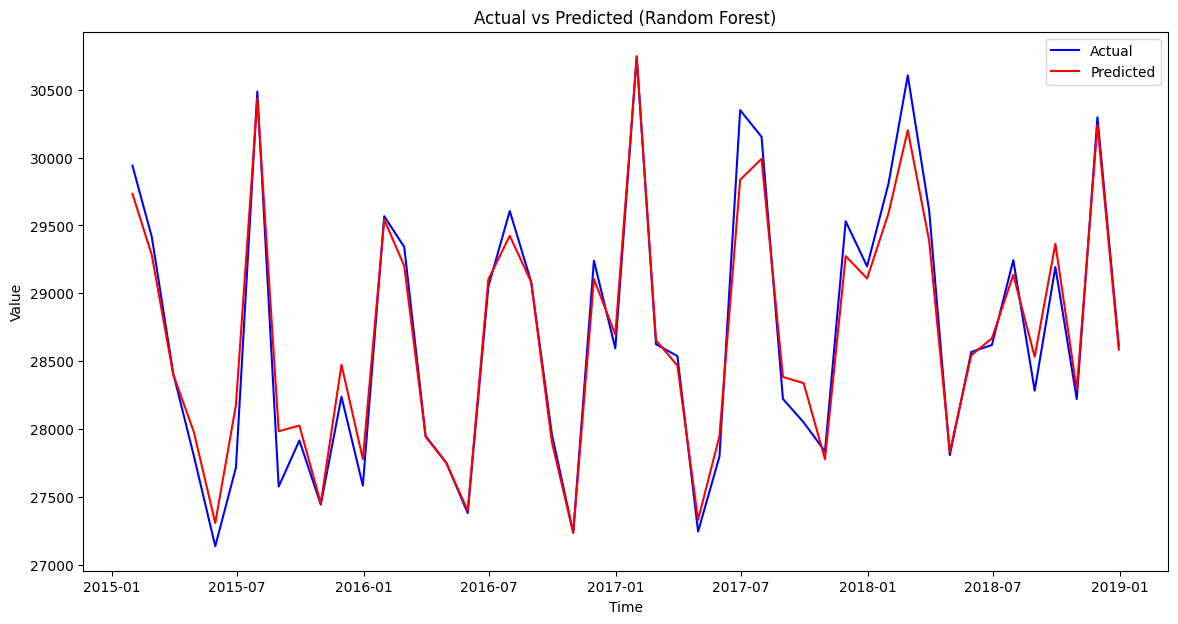

Best parameters for 'total load actual': {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 20}
Best score for 'total load actual': 0.9406357607762206
Training Random Forest model for 'price actual'...
Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END max_depth=20, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   4.0s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   3.6s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   3.7s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   3.5s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   3.6s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_spli

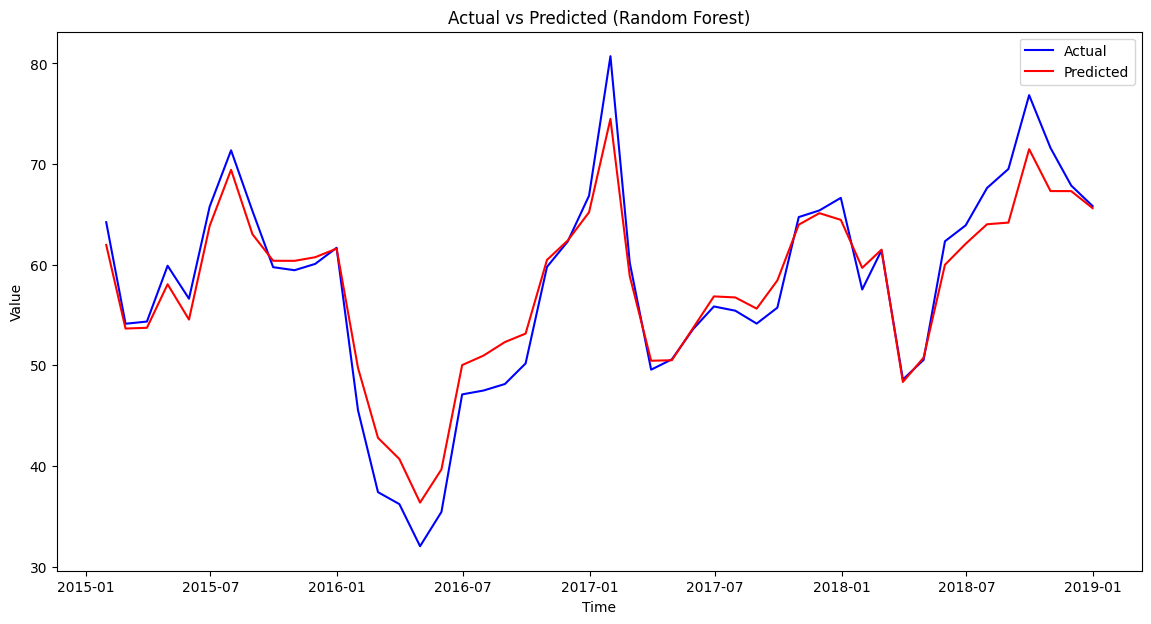

Best parameters for 'price actual': {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 20}
Best score for 'price actual': 0.8424866452141048


In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Function to calculate Mean Absolute Percentage Error (MAPE)
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Function to calculate Adjusted R-squared
def adjusted_r2_score(r2, n, p):
    return 1 - (1 - r2) * (n - 1) / (n - p - 1)

# Function to resample the actual and predicted values to monthly frequency
def resample_monthly(time_indices, actual, predicted):
    df = pd.DataFrame({
        'time': time_indices,
        'actual': actual,
        'predicted': predicted
    })
    df['time'] = pd.to_datetime(df['time'])
    df.set_index('time', inplace=True)
    df_resampled = df.resample('M').mean()
    return df_resampled

# Function to plot actual vs. predicted values
def plot_actual_vs_predicted(resampled_df, title):
    plt.figure(figsize=(14, 7))
    plt.plot(resampled_df.index, resampled_df['actual'], label='Actual', color='blue')
    plt.plot(resampled_df.index, resampled_df['predicted'], label='Predicted', color='red')
    plt.title(title)
    plt.xlabel('Time')
    plt.ylabel('Value')
    plt.legend()
    plt.show()


# Choose the scaler
scaler = StandardScaler()

# Scale the 'total load actual' data
X_train_tl_scaled = scaler.fit_transform(X_train_tl)
X_val_tl_scaled = scaler.transform(X_val_tl)
X_test_tl_scaled = scaler.transform(X_test_tl)

# Scale the 'price actual' data
X_train_pa_scaled = scaler.fit_transform(X_train_pa)
X_val_pa_scaled = scaler.transform(X_val_pa)
X_test_pa_scaled = scaler.transform(X_test_pa)

# Define the parameter grid for Random Forest
param_distributions_rf = {
    'n_estimators': [50, 100],  # Reduced to minimize runtime
    'max_features': ['sqrt', 'log2'],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Initialize the Random Forest model
rf_model = RandomForestRegressor(random_state=42)

def evaluate_model(model, X_train_scaled, X_val_scaled, X_test_scaled, y_train, y_val, y_test, time_indices):
    # Fit the model
    model.fit(X_train_scaled, y_train)

    # Predictions
    y_test_pred = model.predict(X_test_scaled)

    # Calculate metrics for test set
    mae_test = mean_absolute_error(y_test, y_test_pred)
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    r2_test = r2_score(y_test, y_test_pred)
    adjusted_r2_test = adjusted_r2_score(r2_test, X_test_scaled.shape[0], X_test_scaled.shape[1])
    mape_test = mean_absolute_percentage_error(y_test, y_test_pred)

    # Print metrics
    print(f"Test MAPE: {mape_test:.2f}%")
    print(f"Test R-squared (R2): {r2_test:.4f}")
    print(f"Test Adjusted R-squared: {adjusted_r2_test:.4f}")
    print(f"Test MAE: {mae_test:.4f}")
    print(f"Test RMSE: {rmse_test:.4f}")
    print()

    # Resample data for plotting
    resampled_df = resample_monthly(time_indices, y_test, y_test_pred)

    # Plot actual vs. predicted for 'total load actual'
    plot_actual_vs_predicted(resampled_df, "Actual vs Predicted (Random Forest)")

    return mape_test, r2_test, adjusted_r2_test, mae_test, rmse_test

# Randomized search of parameters for 'total load actual'
rf_random_tl = RandomizedSearchCV(estimator=rf_model, param_distributions=param_distributions_rf,
                                  n_iter=10, cv=3, verbose=2, random_state=42, n_jobs=1)  # Use 1 job to avoid issues

# Fit the randomized search model for 'total load actual'
print("Training Random Forest model for 'total load actual'...")
metrics_tl = evaluate_model(rf_random_tl, X_train_tl_scaled, X_val_tl_scaled, X_test_tl_scaled, y_train_tl, y_val_tl, y_test_tl, time_test_tl)

# Best parameters and score for 'total load actual'
print(f"Best parameters for 'total load actual': {rf_random_tl.best_params_}")
print(f"Best score for 'total load actual': {rf_random_tl.best_score_}")

# Randomized search of parameters for 'price actual'
rf_random_pa = RandomizedSearchCV(estimator=rf_model, param_distributions=param_distributions_rf,
                                  n_iter=10, cv=3, verbose=2, random_state=42, n_jobs=1)  # Use 1 job to avoid issues

# Fit the randomized search model for 'price actual'
print("Training Random Forest model for 'price actual'...")
metrics_pa = evaluate_model(rf_random_pa, X_train_pa_scaled, X_val_pa_scaled, X_test_pa_scaled, y_train_pa, y_val_pa, y_test_pa, time_test_pa)

# Best parameters and score for 'price actual'
print(f"Best parameters for 'price actual': {rf_random_pa.best_params_}")
print(f"Best score for 'price actual': {rf_random_pa.best_score_}")


**GRADIENT BOOSTING MODEL WITH HYPERPARAMETER TUNING AND USING RANDOMIZED SEARCH**

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END learning_rate=0.05, max_depth=3, n_estimators=100, subsample=0.8; total time=  13.6s
[CV] END learning_rate=0.05, max_depth=3, n_estimators=100, subsample=0.8; total time=  10.4s
[CV] END learning_rate=0.05, max_depth=3, n_estimators=100, subsample=0.8; total time=  10.0s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=50, subsample=0.8; total time=   4.2s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=50, subsample=0.8; total time=   5.6s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=50, subsample=0.8; total time=   4.4s
[CV] END learning_rate=0.01, max_depth=5, n_estimators=100, subsample=0.9; total time=  17.0s
[CV] END learning_rate=0.01, max_depth=5, n_estimators=100, subsample=0.9; total time=  16.8s
[CV] END learning_rate=0.01, max_depth=5, n_estimators=100, subsample=0.9; total time=  16.8s
[CV] END learning_rate=0.05, max_depth=3, n_estimators=100, subsample=0.9; total time=  13.3s
[C

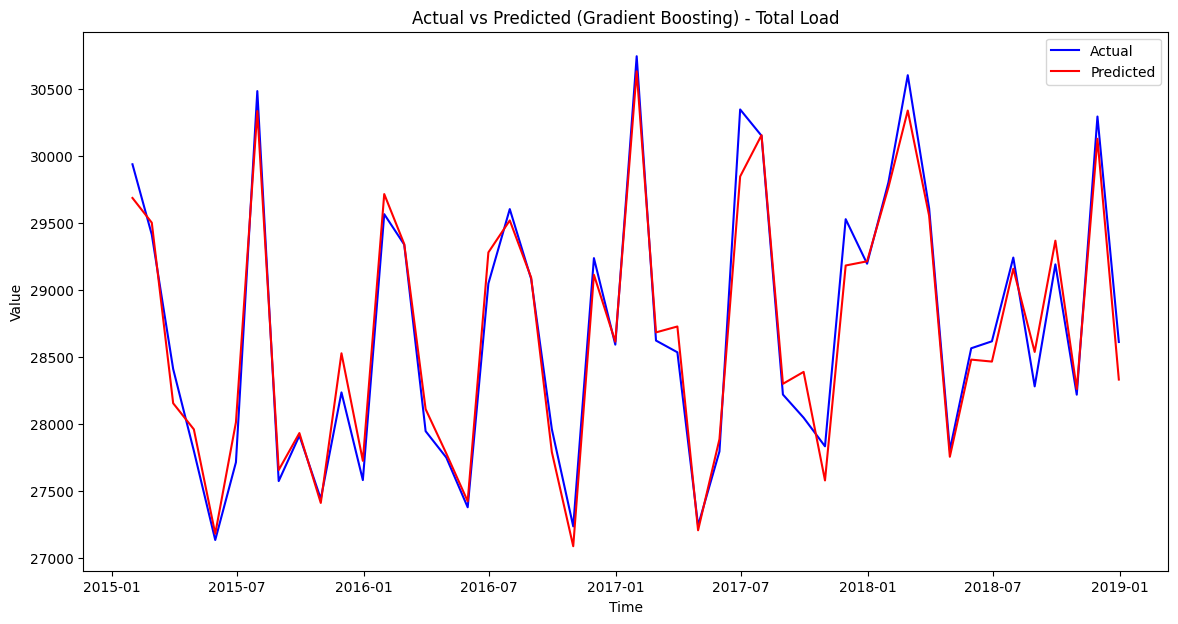

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END learning_rate=0.05, max_depth=3, n_estimators=100, subsample=0.8; total time=  10.9s
[CV] END learning_rate=0.05, max_depth=3, n_estimators=100, subsample=0.8; total time=   9.6s
[CV] END learning_rate=0.05, max_depth=3, n_estimators=100, subsample=0.8; total time=  11.6s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=50, subsample=0.8; total time=   6.5s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=50, subsample=0.8; total time=   5.2s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=50, subsample=0.8; total time=   4.8s
[CV] END learning_rate=0.01, max_depth=5, n_estimators=100, subsample=0.9; total time=  19.8s
[CV] END learning_rate=0.01, max_depth=5, n_estimators=100, subsample=0.9; total time=  20.6s
[CV] END learning_rate=0.01, max_depth=5, n_estimators=100, subsample=0.9; total time=  18.8s
[CV] END learning_rate=0.05, max_depth=3, n_estimators=100, subsample=0.9; total time=  14.1s
[C

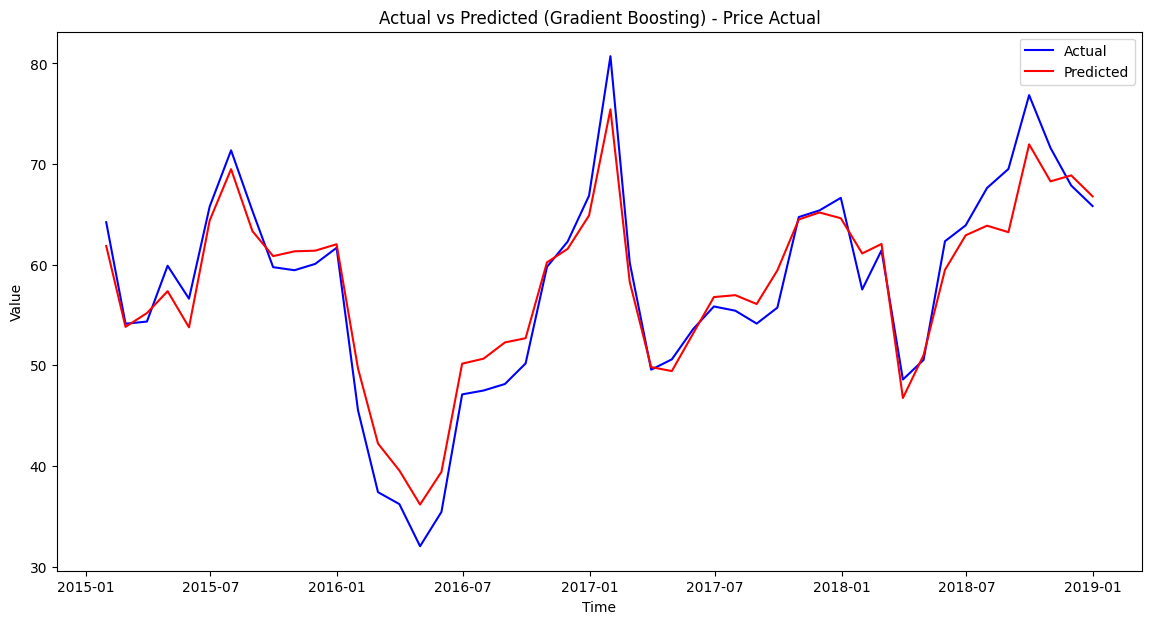

In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt



# Function to calculate Mean Absolute Percentage Error (MAPE)
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Function to calculate Adjusted R-squared
def adjusted_r2_score(r2, n, p):
    return 1 - (1 - r2) * (n - 1) / (n - p - 1)

# Choose the scaler
scaler = StandardScaler()

# Scale the 'total load actual' data
X_train_tl_scaled = scaler.fit_transform(X_train_tl)
X_val_tl_scaled = scaler.transform(X_val_tl)
X_test_tl_scaled = scaler.transform(X_test_tl)

# Scale the 'price actual' data
X_train_pa_scaled = scaler.fit_transform(X_train_pa)
X_val_pa_scaled = scaler.transform(X_val_pa)
X_test_pa_scaled = scaler.transform(X_test_pa)

# Define the parameter grid for Gradient Boosting
param_grid_gb = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 4, 5],
    'subsample': [0.8, 0.9, 1.0]
}

# Initialize the Gradient Boosting model
gb_model = GradientBoostingRegressor(random_state=42)

def evaluate_model(model, X_train_scaled, X_val_scaled, X_test_scaled, y_train, y_val, y_test):
    # Fit the model
    model.fit(X_train_scaled, y_train)

    # Predictions
    y_test_pred = model.predict(X_test_scaled)

    # Calculate metrics for test set
    mae_test = mean_absolute_error(y_test, y_test_pred)
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    r2_test = r2_score(y_test, y_test_pred)
    adjusted_r2_test = adjusted_r2_score(r2_test, X_test_scaled.shape[0], X_test_scaled.shape[1])
    mape_test = mean_absolute_percentage_error(y_test, y_test_pred)

    return {
        'test': {'MAPE': mape_test, 'R-squared': r2_test, 'Adjusted R-squared': adjusted_r2_test, 'MAE': mae_test, 'RMSE': rmse_test}
    }

# Function to resample the actual and predicted values to monthly frequency
def resample_monthly(time_indices, actual, predicted):
    df = pd.DataFrame({
        'time': time_indices,
        'actual': actual,
        'predicted': predicted
    })
    df['time'] = pd.to_datetime(df['time'])
    df.set_index('time', inplace=True)
    df_resampled = df.resample('M').mean()
    return df_resampled

# Function to plot actual vs. predicted values
def plot_actual_vs_predicted(resampled_df, title):
    plt.figure(figsize=(14, 7))
    plt.plot(resampled_df.index, resampled_df['actual'], label='Actual', color='blue')
    plt.plot(resampled_df.index, resampled_df['predicted'], label='Predicted', color='red')
    plt.title(title)
    plt.xlabel('Time')
    plt.ylabel('Value')
    plt.legend()
    plt.show()

# Randomized search of parameters for 'total load actual'
gb_random_tl = RandomizedSearchCV(estimator=gb_model, param_distributions=param_grid_gb,
                                  n_iter=10, cv=3, verbose=2, random_state=42, n_jobs=1)

# Fit the randomized search model for 'total load actual'
gb_random_tl.fit(X_train_tl_scaled, y_train_tl)
metrics_tl = evaluate_model(gb_random_tl.best_estimator_, X_train_tl_scaled, X_val_tl_scaled, X_test_tl_scaled, y_train_tl, y_val_tl, y_test_tl)

# Best parameters and score for 'total load actual'
print(f"Best parameters for 'total load actual': {gb_random_tl.best_params_}")
print(f"Best score for 'total load actual': {gb_random_tl.best_score_}\n")

# Print metrics for 'total load actual' test set
print("Test set metrics for 'total load actual' using Gradient Boosting:")
print(f"MAPE: {metrics_tl['test']['MAPE']:.2f}%")
print(f"R-squared (R2): {metrics_tl['test']['R-squared']:.4f}")
print(f"Adjusted R-squared: {metrics_tl['test']['Adjusted R-squared']:.4f}")
print(f"MAE: {metrics_tl['test']['MAE']:.4f}")
print(f"RMSE: {metrics_tl['test']['RMSE']:.4f}")

# Plot actual vs. predicted for 'total load actual' on test set
resampled_df_tl = resample_monthly(time_test_tl, y_test_tl, gb_random_tl.best_estimator_.predict(X_test_tl_scaled))
plot_actual_vs_predicted(resampled_df_tl, "Actual vs Predicted (Gradient Boosting) - Total Load")

# Randomized search of parameters for 'price actual'
gb_random_pa = RandomizedSearchCV(estimator=gb_model, param_distributions=param_grid_gb,
                                  n_iter=10, cv=3, verbose=2, random_state=42, n_jobs=1)

# Fit the randomized search model for 'price actual'
gb_random_pa.fit(X_train_pa_scaled, y_train_pa)
metrics_pa = evaluate_model(gb_random_pa.best_estimator_, X_train_pa_scaled, X_val_pa_scaled, X_test_pa_scaled, y_train_pa, y_val_pa, y_test_pa)

# Best parameters and score for 'price actual'
print(f"\nBest parameters for 'price actual': {gb_random_pa.best_params_}")
print(f"Best score for 'price actual': {gb_random_pa.best_score_}\n")

# Print metrics for 'price actual' test set
print("Test set metrics for 'price actual' using Gradient Boosting:")
print(f"MAPE: {metrics_pa['test']['MAPE']:.2f}%")
print(f"R-squared (R2): {metrics_pa['test']['R-squared']:.4f}")
print(f"Adjusted R-squared: {metrics_pa['test']['Adjusted R-squared']:.4f}")
print(f"MAE: {metrics_pa['test']['MAE']:.4f}")
print(f"RMSE: {metrics_pa['test']['RMSE']:.4f}")

# Plot actual vs. predicted for 'price actual' on test set
resampled_df_pa = resample_monthly(time_test_pa, y_test_pa, gb_random_pa.best_estimator_.predict(X_test_pa_scaled))
plot_actual_vs_predicted(resampled_df_pa, "Actual vs Predicted (Gradient Boosting) - Price Actual")


**LONG SHORT TERM MEMORY(LSTM) MODEL**

Training LSTM model for 'total load actual'...
Epoch 1/50
658/658 [==============================] - 4s 4ms/step - loss: 831277184.0000 - val_loss: 810990528.0000
Epoch 2/50
658/658 [==============================] - 2s 3ms/step - loss: 766946944.0000 - val_loss: 721796800.0000
Epoch 3/50
658/658 [==============================] - 3s 5ms/step - loss: 660642240.0000 - val_loss: 601270080.0000
Epoch 4/50
658/658 [==============================] - 2s 3ms/step - loss: 532903840.0000 - val_loss: 468585568.0000
Epoch 5/50
658/658 [==============================] - 2s 3ms/step - loss: 401153152.0000 - val_loss: 339299232.0000
Epoch 6/50
658/658 [==============================] - 2s 3ms/step - loss: 278984928.0000 - val_loss: 225173840.0000
Epoch 7/50
658/658 [==============================] - 2s 3ms/step - loss: 176374208.0000 - val_loss: 134430128.0000
Epoch 8/50
658/658 [==============================] - 2s 3ms/step - loss: 99411448.0000 - val_loss: 70959120.0000
Epoch 9/50
658/658 [=======

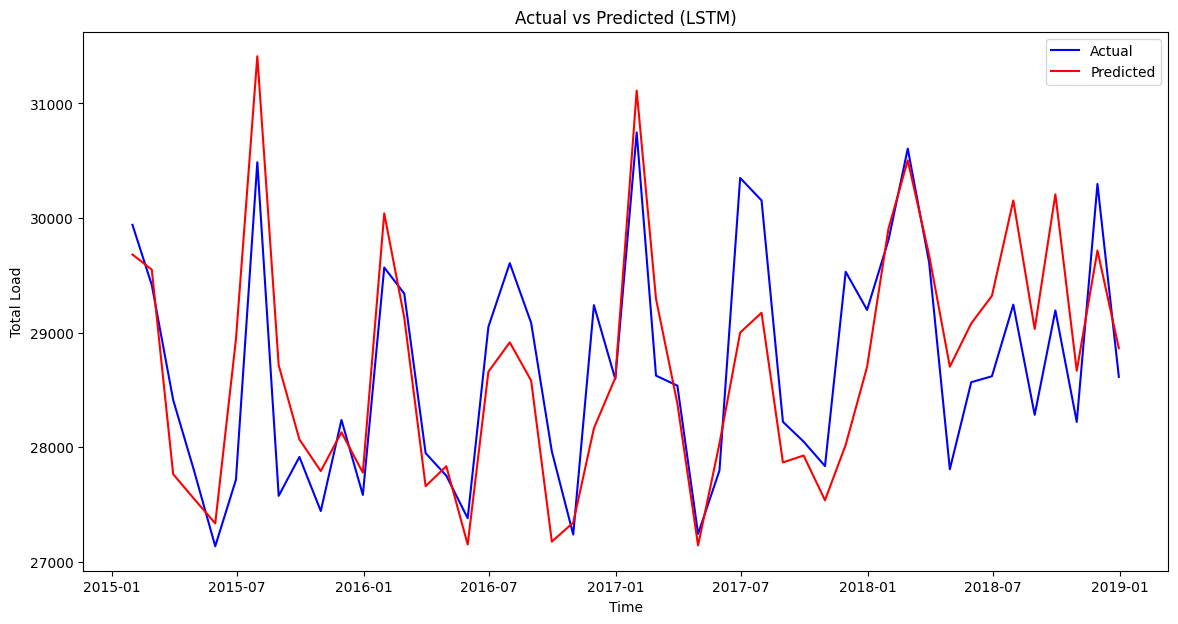

Training LSTM model for 'price actual'...
Epoch 1/50
658/658 [==============================] - 5s 4ms/step - loss: 565.8438 - val_loss: 133.2922
Epoch 2/50
658/658 [==============================] - 3s 5ms/step - loss: 122.4074 - val_loss: 113.3894
Epoch 3/50
658/658 [==============================] - 2s 3ms/step - loss: 108.7741 - val_loss: 104.0975
Epoch 4/50
658/658 [==============================] - 2s 3ms/step - loss: 99.9167 - val_loss: 95.0617
Epoch 5/50
658/658 [==============================] - 2s 3ms/step - loss: 92.9326 - val_loss: 90.1703
Epoch 6/50
658/658 [==============================] - 2s 3ms/step - loss: 88.1928 - val_loss: 86.7014
Epoch 7/50
658/658 [==============================] - 3s 4ms/step - loss: 84.9344 - val_loss: 83.6672
Epoch 8/50
658/658 [==============================] - 4s 5ms/step - loss: 82.0285 - val_loss: 81.2666
Epoch 9/50
658/658 [==============================] - 2s 3ms/step - loss: 79.1462 - val_loss: 80.8075
Epoch 10/50
658/658 [=============

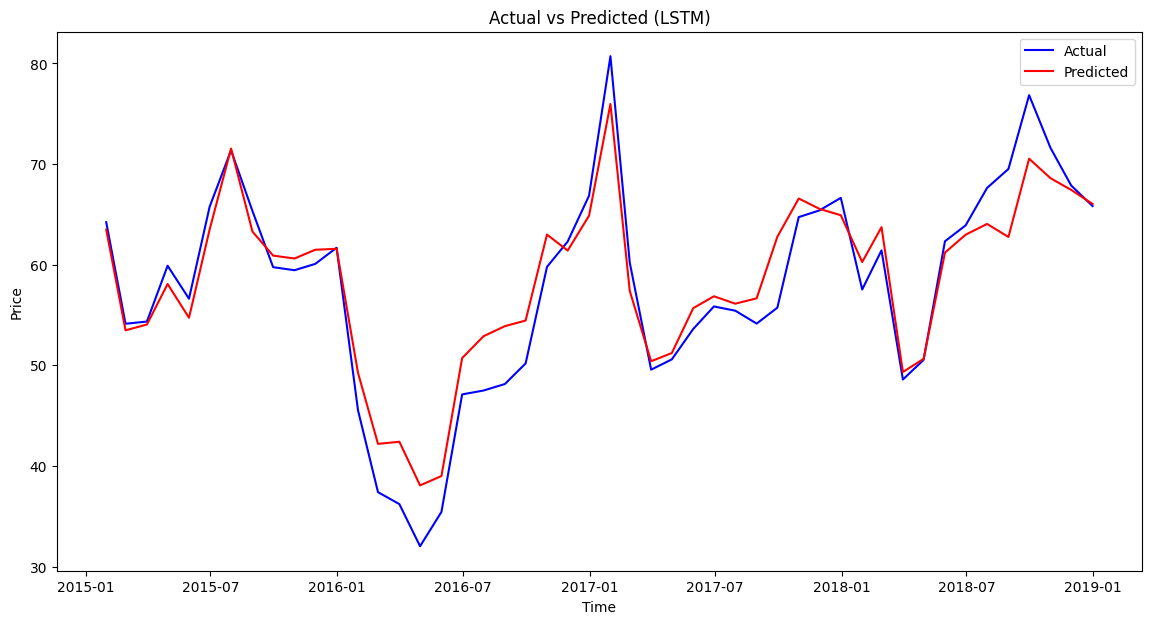

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam

# Assuming you have already defined X_train_tl, X_val_tl, X_test_tl, y_train_tl, y_val_tl, y_test_tl
# and X_train_pa, X_val_pa, X_test_pa, y_train_pa, y_val_pa, y_test_pa

# Function to calculate Mean Absolute Percentage Error (MAPE)
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Function to calculate Adjusted R-squared
def adjusted_r2_score(r2, n, p):
    return 1 - (1 - r2) * (n - 1) / (n - p - 1)

# Normalize the features
scaler = MinMaxScaler()

X_train_tl_scaled = scaler.fit_transform(X_train_tl)
X_val_tl_scaled = scaler.transform(X_val_tl)
X_test_tl_scaled = scaler.transform(X_test_tl)

X_train_pa_scaled = scaler.fit_transform(X_train_pa)
X_val_pa_scaled = scaler.transform(X_val_pa)
X_test_pa_scaled = scaler.transform(X_test_pa)

# Reshape the data for LSTM (samples, time steps, features)
X_train_tl_scaled = X_train_tl_scaled.reshape((X_train_tl_scaled.shape[0], 1, X_train_tl_scaled.shape[1]))
X_val_tl_scaled = X_val_tl_scaled.reshape((X_val_tl_scaled.shape[0], 1, X_val_tl_scaled.shape[1]))
X_test_tl_scaled = X_test_tl_scaled.reshape((X_test_tl_scaled.shape[0], 1, X_test_tl_scaled.shape[1]))

X_train_pa_scaled = X_train_pa_scaled.reshape((X_train_pa_scaled.shape[0], 1, X_train_pa_scaled.shape[1]))
X_val_pa_scaled = X_val_pa_scaled.reshape((X_val_pa_scaled.shape[0], 1, X_val_pa_scaled.shape[1]))
X_test_pa_scaled = X_test_pa_scaled.reshape((X_test_pa_scaled.shape[0], 1, X_test_pa_scaled.shape[1]))

# Function to build LSTM model
def build_lstm_model(input_shape, units=50):
    model = Sequential()
    model.add(LSTM(units, activation='relu', input_shape=input_shape))
    model.add(Dense(1))
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')
    return model

# Function to train LSTM model and calculate metrics
def train_lstm_model(X_train_scaled, y_train, X_val_scaled, y_val, X_test_scaled, y_test, time_indices, ylabel):
    model = build_lstm_model((X_train_scaled.shape[1], X_train_scaled.shape[2]))  # (time_steps, features)
    model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_data=(X_val_scaled, y_val), verbose=1)

    # Predictions and metrics for test set
    y_test_pred = model.predict(X_test_scaled).flatten()
    mape = mean_absolute_percentage_error(y_test, y_test_pred)
    r2 = r2_score(y_test, y_test_pred)
    mae = mean_absolute_error(y_test, y_test_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
    adjusted_r2 = adjusted_r2_score(r2, X_test_scaled.shape[0], X_test_scaled.shape[2])

    # Print metrics
    print("Metrics:")
    print(f"Test MAPE: {mape:.2f}%")
    print(f"Test R-squared (R2): {r2:.2f}")
    print(f"Test Adjusted R-squared: {adjusted_r2:.2f}")
    print(f"Test MAE: {mae:.2f}")
    print(f"Test RMSE: {rmse:.2f}")
    print()

    # Resample data for plotting
    resampled_df = resample_monthly(time_indices, y_test, y_test_pred)

    # Plot actual vs. predicted for 'total load actual' on test set
    plot_actual_vs_predicted(resampled_df, "Actual vs Predicted (LSTM)", ylabel)

    return mape, r2, adjusted_r2, mae, rmse

# Function to resample the actual and predicted values to monthly frequency
def resample_monthly(time_indices, actual, predicted):
    df = pd.DataFrame({
        'time': time_indices,
        'actual': actual,
        'predicted': predicted
    })
    df['time'] = pd.to_datetime(df['time'])
    df.set_index('time', inplace=True)
    df_resampled = df.resample('M').mean()
    return df_resampled

# Function to plot actual vs. predicted values
def plot_actual_vs_predicted(resampled_df, title, ylabel):
    plt.figure(figsize=(14, 7))
    plt.plot(resampled_df.index, resampled_df['actual'], label='Actual', color='blue')
    plt.plot(resampled_df.index, resampled_df['predicted'], label='Predicted', color='red')
    plt.title(title)
    plt.xlabel('Time')
    plt.ylabel(ylabel)
    plt.legend()
    plt.show()

# Train LSTM model for 'total load actual'
print("Training LSTM model for 'total load actual'...")
mape_tl, r2_tl, adj_r2_tl, mae_tl, rmse_tl = train_lstm_model(X_train_tl_scaled, y_train_tl, X_val_tl_scaled, y_val_tl, X_test_tl_scaled, y_test_tl, time_test_tl, 'Total Load')

# Train LSTM model for 'price actual'
print("Training LSTM model for 'price actual'...")
mape_pa, r2_pa, adj_r2_pa, mae_pa, rmse_pa = train_lstm_model(X_train_pa_scaled, y_train_pa, X_val_pa_scaled, y_val_pa, X_test_pa_scaled, y_test_pa, time_test_pa, 'Price')


**LSTM MODEL WITH HYPERPARAMETER TUNING**

Hyperparameter tuning for 'total load actual'...
Training with units=50, learning_rate=0.001, epochs=20...
Epoch 1/20
658/658 [==============================] - 7s 7ms/step - loss: 827270912.0000 - val_loss: 798872000.0000
Epoch 2/20
658/658 [==============================] - 8s 12ms/step - loss: 740998912.0000 - val_loss: 680044992.0000
Epoch 3/20
658/658 [==============================] - 7s 10ms/step - loss: 602196672.0000 - val_loss: 526211584.0000
Epoch 4/20
658/658 [==============================] - 6s 9ms/step - loss: 444355104.0000 - val_loss: 368147488.0000
Epoch 5/20
658/658 [==============================] - 5s 8ms/step - loss: 294597504.0000 - val_loss: 228978784.0000
Epoch 6/20
658/658 [==============================] - 4s 6ms/step - loss: 171765792.0000 - val_loss: 123378272.0000
Epoch 7/20
658/658 [==============================] - 5s 8ms/step - loss: 85971112.0000 - val_loss: 56787000.0000
Epoch 8/20
658/658 [==============================] - 6s 9ms/step - loss: 3775431

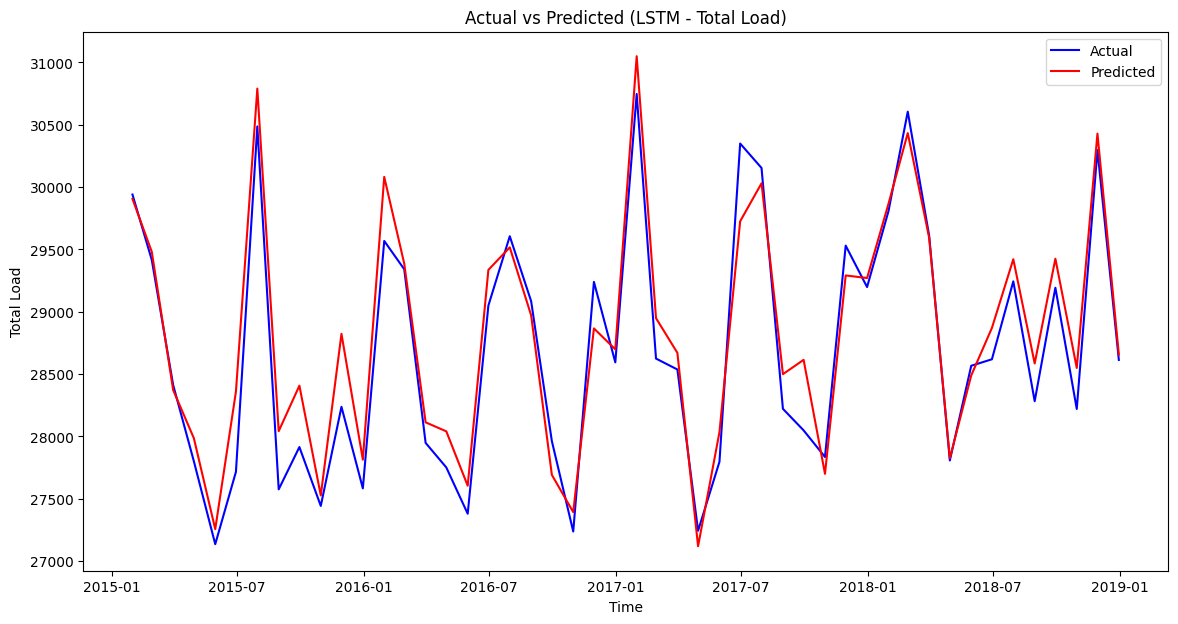

Best metrics for 'total load actual':
MAPE: 3.81%
R-squared (R2): 0.91
Adjusted R-squared: 0.91
MAE: 1059.24
RMSE: 1372.29
Hyperparameter tuning for 'price actual'...
Training with units=50, learning_rate=0.001, epochs=20...
Epoch 1/20
658/658 [==============================] - 6s 6ms/step - loss: 592.4374 - val_loss: 133.4696
Epoch 2/20
658/658 [==============================] - 3s 5ms/step - loss: 120.3933 - val_loss: 110.6275
Epoch 3/20
658/658 [==============================] - 2s 3ms/step - loss: 107.1878 - val_loss: 101.9019
Epoch 4/20
658/658 [==============================] - 2s 3ms/step - loss: 99.3387 - val_loss: 95.5057
Epoch 5/20
658/658 [==============================] - 2s 4ms/step - loss: 92.7950 - val_loss: 90.2720
Epoch 6/20
658/658 [==============================] - 3s 4ms/step - loss: 87.9346 - val_loss: 86.3512
Epoch 7/20
658/658 [==============================] - 4s 6ms/step - loss: 84.0812 - val_loss: 83.3871
Epoch 8/20
658/658 [==============================] - 3

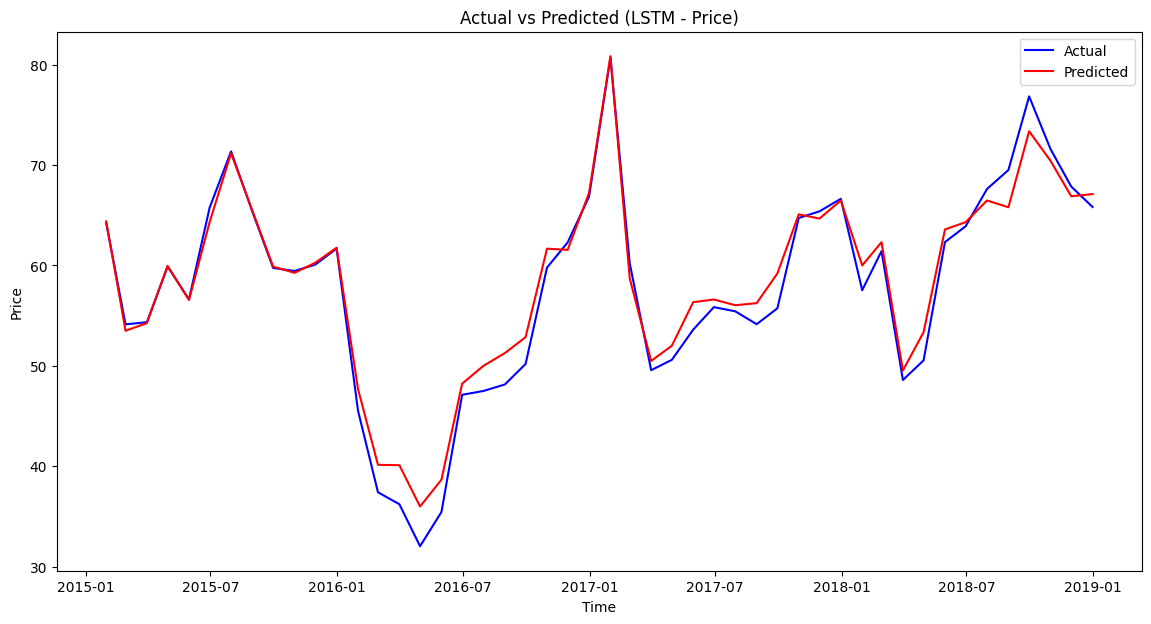

Best metrics for 'price actual':
MAPE: 8.60%
R-squared (R2): 0.85
Adjusted R-squared: 0.84
MAE: 4.25
RMSE: 5.58
Best parameters for 'total load actual': {'units': 100, 'learning_rate': 0.01, 'epochs': 50}
Best parameters for 'price actual': {'units': 100, 'learning_rate': 0.01, 'epochs': 50}


In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam

# Function to calculate Mean Absolute Percentage Error (MAPE)
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Function to calculate Adjusted R-squared
def adjusted_r2_score(r2, n, p):
    return 1 - (1 - r2) * (n - 1) / (n - p - 1)

# Normalize the features
scaler_tl = MinMaxScaler()
X_train_tl_scaled = scaler_tl.fit_transform(X_train_tl)
X_val_tl_scaled = scaler_tl.transform(X_val_tl)
X_test_tl_scaled = scaler_tl.transform(X_test_tl)

scaler_pa = MinMaxScaler()
X_train_pa_scaled = scaler_pa.fit_transform(X_train_pa)
X_val_pa_scaled = scaler_pa.transform(X_val_pa)
X_test_pa_scaled = scaler_pa.transform(X_test_pa)

# Reshape the data for LSTM (samples, time steps, features)
X_train_tl_scaled = X_train_tl_scaled.reshape((X_train_tl_scaled.shape[0], 1, X_train_tl_scaled.shape[1]))
X_val_tl_scaled = X_val_tl_scaled.reshape((X_val_tl_scaled.shape[0], 1, X_val_tl_scaled.shape[1]))
X_test_tl_scaled = X_test_tl_scaled.reshape((X_test_tl_scaled.shape[0], 1, X_test_tl_scaled.shape[1]))

X_train_pa_scaled = X_train_pa_scaled.reshape((X_train_pa_scaled.shape[0], 1, X_train_pa_scaled.shape[1]))
X_val_pa_scaled = X_val_pa_scaled.reshape((X_val_pa_scaled.shape[0], 1, X_val_pa_scaled.shape[1]))
X_test_pa_scaled = X_test_pa_scaled.reshape((X_test_pa_scaled.shape[0], 1, X_test_pa_scaled.shape[1]))

# Function to build LSTM model
def build_lstm_model(input_shape, units=50, learning_rate=0.001):
    model = Sequential()
    model.add(LSTM(units, activation='relu', input_shape=input_shape))
    model.add(Dense(1))
    model.compile(optimizer=Adam(learning_rate=learning_rate), loss='mse')
    return model

# Function to train LSTM model and calculate metrics
def train_lstm_model(X_train_scaled, y_train, X_val_scaled, y_val, X_test_scaled, y_test, time_indices, ylabel, units=50, learning_rate=0.001, epochs=50):
    model = build_lstm_model((X_train_scaled.shape[1], X_train_scaled.shape[2]), units, learning_rate)
    model.fit(X_train_scaled, y_train, epochs=epochs, batch_size=32, validation_data=(X_val_scaled, y_val), verbose=1)

    # Predictions and metrics for test set
    y_test_pred = model.predict(X_test_scaled).flatten()
    mape = mean_absolute_percentage_error(y_test, y_test_pred)
    r2 = r2_score(y_test, y_test_pred)
    mae = mean_absolute_error(y_test, y_test_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
    adjusted_r2 = adjusted_r2_score(r2, X_test_scaled.shape[0], X_test_scaled.shape[2])

    return model, mape, r2, adjusted_r2, mae, rmse, y_test_pred

# Function to resample the actual and predicted values to monthly frequency
def resample_monthly(time_indices, actual, predicted):
    df = pd.DataFrame({
        'time': time_indices,
        'actual': actual,
        'predicted': predicted
    })
    df['time'] = pd.to_datetime(df['time'])
    df.set_index('time', inplace=True)
    df_resampled = df.resample('M').mean()
    return df_resampled

# Function to plot actual vs. predicted values
def plot_actual_vs_predicted(resampled_df, title, ylabel):
    plt.figure(figsize=(14, 7))
    plt.plot(resampled_df.index, resampled_df['actual'], label='Actual', color='blue')
    plt.plot(resampled_df.index, resampled_df['predicted'], label='Predicted', color='red')
    plt.title(title)
    plt.xlabel('Time')
    plt.ylabel(ylabel)
    plt.legend()
    plt.show()

# Hyperparameter tuning
def hyperparameter_tuning(X_train_scaled, y_train, X_val_scaled, y_val, X_test_scaled, y_test, time_indices, ylabel):
    best_mape = float('inf')
    best_params = {}
    best_model = None
    best_y_test_pred = None
    best_metrics = {}

    for units in [50, 100]:
        for learning_rate in [0.001, 0.01]:
            for epochs in [20, 50]:
                print(f"Training with units={units}, learning_rate={learning_rate}, epochs={epochs}...")
                model, mape, r2, adj_r2, mae, rmse, y_test_pred = train_lstm_model(X_train_scaled, y_train, X_val_scaled, y_val, X_test_scaled, y_test, time_indices, ylabel, units, learning_rate, epochs)

                if mape < best_mape:
                    best_mape = mape
                    best_params = {'units': units, 'learning_rate': learning_rate, 'epochs': epochs}
                    best_model = model
                    best_y_test_pred = y_test_pred
                    best_metrics = {
                        'mape': mape,
                        'r2': r2,
                        'adjusted_r2': adj_r2,
                        'mae': mae,
                        'rmse': rmse
                    }

    print(f"Best parameters: {best_params}")
    return best_model, best_y_test_pred, best_params, best_metrics

# Train LSTM model for 'total load actual'
print("Hyperparameter tuning for 'total load actual'...")
best_model_tl, best_y_test_pred_tl, best_params_tl, best_metrics_tl = hyperparameter_tuning(X_train_tl_scaled, y_train_tl, X_val_tl_scaled, y_val_tl, X_test_tl_scaled, y_test_tl, time_test_tl, 'Total Load')

# Resample data for plotting
resampled_df_tl = resample_monthly(time_test_tl, y_test_tl, best_y_test_pred_tl)

# Plot actual vs. predicted for 'total load actual' on test set
plot_actual_vs_predicted(resampled_df_tl, "Actual vs Predicted (LSTM - Total Load)", 'Total Load')

# Print best metrics for 'total load actual'
print("Best metrics for 'total load actual':")
print(f"MAPE: {best_metrics_tl['mape']:.2f}%")
print(f"R-squared (R2): {best_metrics_tl['r2']:.2f}")
print(f"Adjusted R-squared: {best_metrics_tl['adjusted_r2']:.2f}")
print(f"MAE: {best_metrics_tl['mae']:.2f}")
print(f"RMSE: {best_metrics_tl['rmse']:.2f}")

# Train LSTM model for 'price actual'
print("Hyperparameter tuning for 'price actual'...")
best_model_pa, best_y_test_pred_pa, best_params_pa, best_metrics_pa = hyperparameter_tuning(X_train_pa_scaled, y_train_pa, X_val_pa_scaled, y_val_pa, X_test_pa_scaled, y_test_pa, time_test_pa, 'Price')

# Resample data for plotting
resampled_df_pa = resample_monthly(time_test_pa, y_test_pa, best_y_test_pred_pa)

# Plot actual vs. predicted for 'price actual' on test set
plot_actual_vs_predicted(resampled_df_pa, "Actual vs Predicted (LSTM - Price)", 'Price')

# Print best metrics for 'price actual'
print("Best metrics for 'price actual':")
print(f"MAPE: {best_metrics_pa['mape']:.2f}%")
print(f"R-squared (R2): {best_metrics_pa['r2']:.2f}")
print(f"Adjusted R-squared: {best_metrics_pa['adjusted_r2']:.2f}")
print(f"MAE: {best_metrics_pa['mae']:.2f}")
print(f"RMSE: {best_metrics_pa['rmse']:.2f}")

print("Best parameters for 'total load actual':", best_params_tl)
print("Best parameters for 'price actual':", best_params_pa)


ERROR METRICS ON TEST DATASET FOR TARGET VARIABLE TOTAL LOAD ACTUAL

In [ ]:
import pandas as pd

data1 = {
    'Model': [
        'Linear Regression', 'Random Forest',
        'Gradient Boosting','Random Forest (Tuned)', 'Gradient Boosting (Tuned)','LSTM','LSTM(TUNED)'

    ],
    'prediction': ['total load actual', 'total load actual', 'total load actual', 'total load actual', 'total load actual','total load actual','total load actual'],
    'Set': ['Test', 'Test', 'Test', 'Test', 'Test','Test','Test'],


    'MAPE in %': [
        4.39,2.65,3.63,2.87,3.12,5.31,3.81
    ],
    'R²': [
       0.88,0.95,0.92,0.9474,0.9380,0.83,0.91  ],
    'Adjusted R²': [
        0.88,0.95,0.92,0.9468,0.9374,0.83,0.91
    ],
    'MAE': [
        1218.81,737.02,1023.55,804.4730,879.7937,1479.97,1059.24
    ],
    'RMSE': [
        1550.38,983.00,1303.02,1047.5360,1136.8729,1863.50,1372.29]
}

# Create the DataFrame
df4 = pd.DataFrame(data1)
print("Comparison of all TOTAL LOAD ACTUAL models")
# Display the DataFrame
df4


Comparison of all TOTAL LOAD ACTUAL models


,Model,prediction,Set,MAPE in %,R²,Adjusted R²,MAE,RMSE
0,Linear Regression,total load actual,Test,4.39,0.8800,0.8800,1218.8100,1550.3800
1,Random Forest,total load actual,Test,2.65,0.9500,0.9500,737.0200,983.0000
2,Gradient Boosting,total load actual,Test,3.63,0.9200,0.9200,1023.5500,1303.0200
3,Random Forest (Tuned),total load actual,Test,2.87,0.9474,0.9468,804.4730,1047.5360
4,Gradient Boosting (Tuned),total load actual,Test,3.12,0.9380,0.9374,879.7937,1136.8729
5,LSTM,total load actual,Test,5.31,0.8300,0.8300,1479.9700,1863.5000
6,LSTM(TUNED),total load actual,Test,3.81,0.9100,0.9100,1059.2400,1372.2900


**Inferences from the error metrics evaluation for target variable Total Load Actual:**
Based on the error metrics for the we see that RANDOM FOREST has minimum MAPE value, MAE and RMSE and maximum R squared and adjusted R squared value. So we can implement this algorithm on the test data to get optimal results.

ERROR METRICS ON TEST DATASET FOR TARGET VARIABLE PRICE ACTUAL

In [ ]:
import pandas as pd

data1 = {
    'Model': [
        'Linear Regression', 'Random Forest',
        'Gradient Boosting','Random Forest (Tuned)', 'Gradient Boosting (Tuned)','LSTM','LSTM(TUNED)'

    ],
    'prediction': ['price actual', 'price actual', 'price actual', 'price actual', 'price actual','price actual','price actual'],
    'Set': ['Test', 'Test', 'Test', 'Test', 'Test','Test','Test'],


    'MAPE in %': [
        14.96,6.44,11.52,7.72,9.30,10.42,8.60
    ],
    'R²': [
        0.57,0.90,0.73,0.8743,0.8191,0.78,0.85
    ],
    'Adjusted R²': [
        0.56,0.90,0.73,0.8729,0.8172,0.78,0.84
    ],
    'MAE': [
        7.32,3.14,5.63 ,3.6964,4.5936,5.11,4.25  ],
    'RMSE': [
        9.38,4.56,7.36,5.0532,6.0611,6.69,5.58 ]
}

# Create the DataFrame
df4 = pd.DataFrame(data1)
print("Comparison of all PRICE ACTUAL models")
# Display the DataFrame
df4

Comparison of all PRICE ACTUAL models


,Model,prediction,Set,MAPE in %,R²,Adjusted R²,MAE,RMSE
0,Linear Regression,price actual,Test,14.96,0.5700,0.5600,7.3200,9.3800
1,Random Forest,price actual,Test,6.44,0.9000,0.9000,3.1400,4.5600
2,Gradient Boosting,price actual,Test,11.52,0.7300,0.7300,5.6300,7.3600
3,Random Forest (Tuned),price actual,Test,7.72,0.8743,0.8729,3.6964,5.0532
4,Gradient Boosting (Tuned),price actual,Test,9.30,0.8191,0.8172,4.5936,6.0611
5,LSTM,price actual,Test,10.42,0.7800,0.7800,5.1100,6.6900
6,LSTM(TUNED),price actual,Test,8.60,0.8500,0.8400,4.2500,5.5800



**Inferences from the error metrics evaluation for target variable Price Actual:**
Based on the error metrics for the we see that RANDOM FOREST has minimum MAPE value, MAE and RMSE and maximum R squared and adjusted R squared value. So we can implement this algorithm on the test data to get optimal results.

**SELECTING IMPORTANT FEATURES WITH A HIGH CORRELATION COEFFICIENT WITH TARGET VARIABLE 'total load actual'**

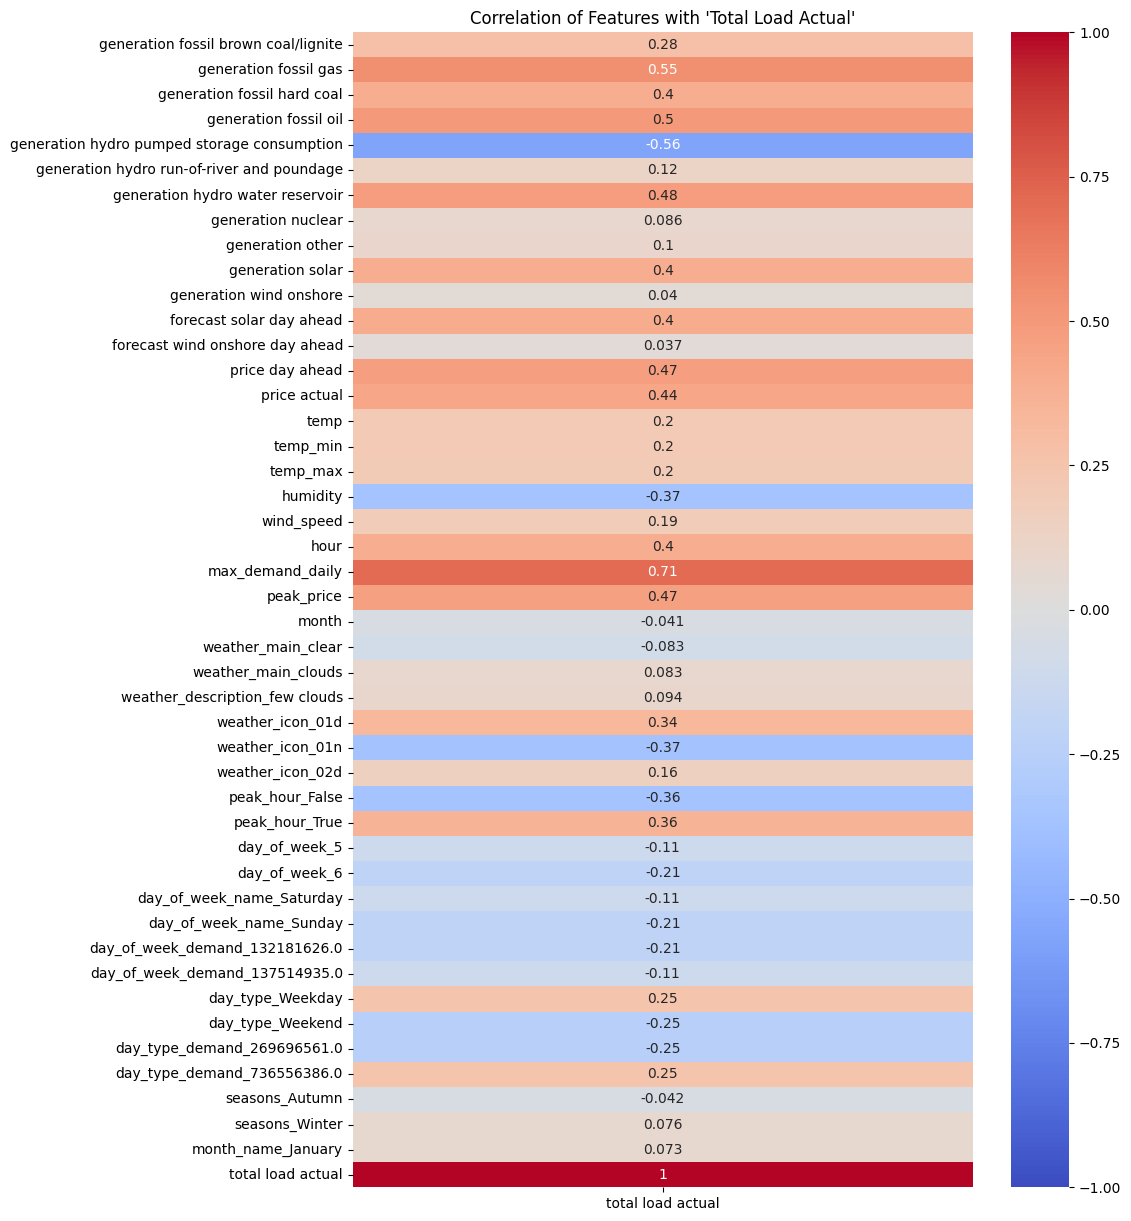

In [ ]:
 import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# List of features to consider for correlation
features = [
    'generation fossil brown coal/lignite', 'generation fossil gas',
    'generation fossil hard coal', 'generation fossil oil',
    'generation hydro pumped storage consumption',
    'generation hydro run-of-river and poundage', 'generation hydro water reservoir',
    'generation nuclear', 'generation other', 'generation solar',
    'generation wind onshore', 'forecast solar day ahead',
    'forecast wind onshore day ahead', 'price day ahead', 'price actual',
    'temp', 'temp_min', 'temp_max', 'humidity', 'wind_speed', 'hour',
    'max_demand_daily', 'peak_price', 'month', 'weather_main_clear',
    'weather_main_clouds', 'weather_description_few clouds',
    'weather_icon_01d', 'weather_icon_01n', 'weather_icon_02d',
    'peak_hour_False', 'peak_hour_True', 'day_of_week_5', 'day_of_week_6',
    'day_of_week_name_Saturday', 'day_of_week_name_Sunday',
    'day_of_week_demand_132181626.0', 'day_of_week_demand_137514935.0',
    'day_type_Weekday', 'day_type_Weekend', 'day_type_demand_269696561.0',
    'day_type_demand_736556386.0', 'seasons_Autumn', 'seasons_Winter',
    'month_name_January', 'total load actual'
]

# Ensure 'merged_df' contains all specified features
if not set(features).issubset(encoded_df.copy().columns):
    missing_features = set(features) - set(encoded_df.copy().columns)
    raise ValueError(f"The following features are missing from the DataFrame: {missing_features}")

# Calculate the correlation matrix
correlation_matrix = encoded_df.copy()[features].corr()

# Extract the correlation values for 'total load actual'
correlation_with_total_load_actual = correlation_matrix[['total load actual']]

# Plot the heatmap
plt.figure(figsize=(10, 15))
sns.heatmap(correlation_with_total_load_actual, annot=True, cmap='coolwarm', cbar=True, vmin=-1, vmax=1)
plt.title("Correlation of Features with 'Total Load Actual'")
plt.show()



**From the above correlation matrix of the feature set with the target variable 'total load actual', we can determine the most important features as 'max demand daily', 'generation hydro pumped storage consumption', 'generation hydro water reservoir', 'generation fossil gas'**



**SELECTING IMPORTANT FEATURES WITH A HIGH CORRELATION COEFFICIENT WITH TARGET VARIABLE 'price actual'**

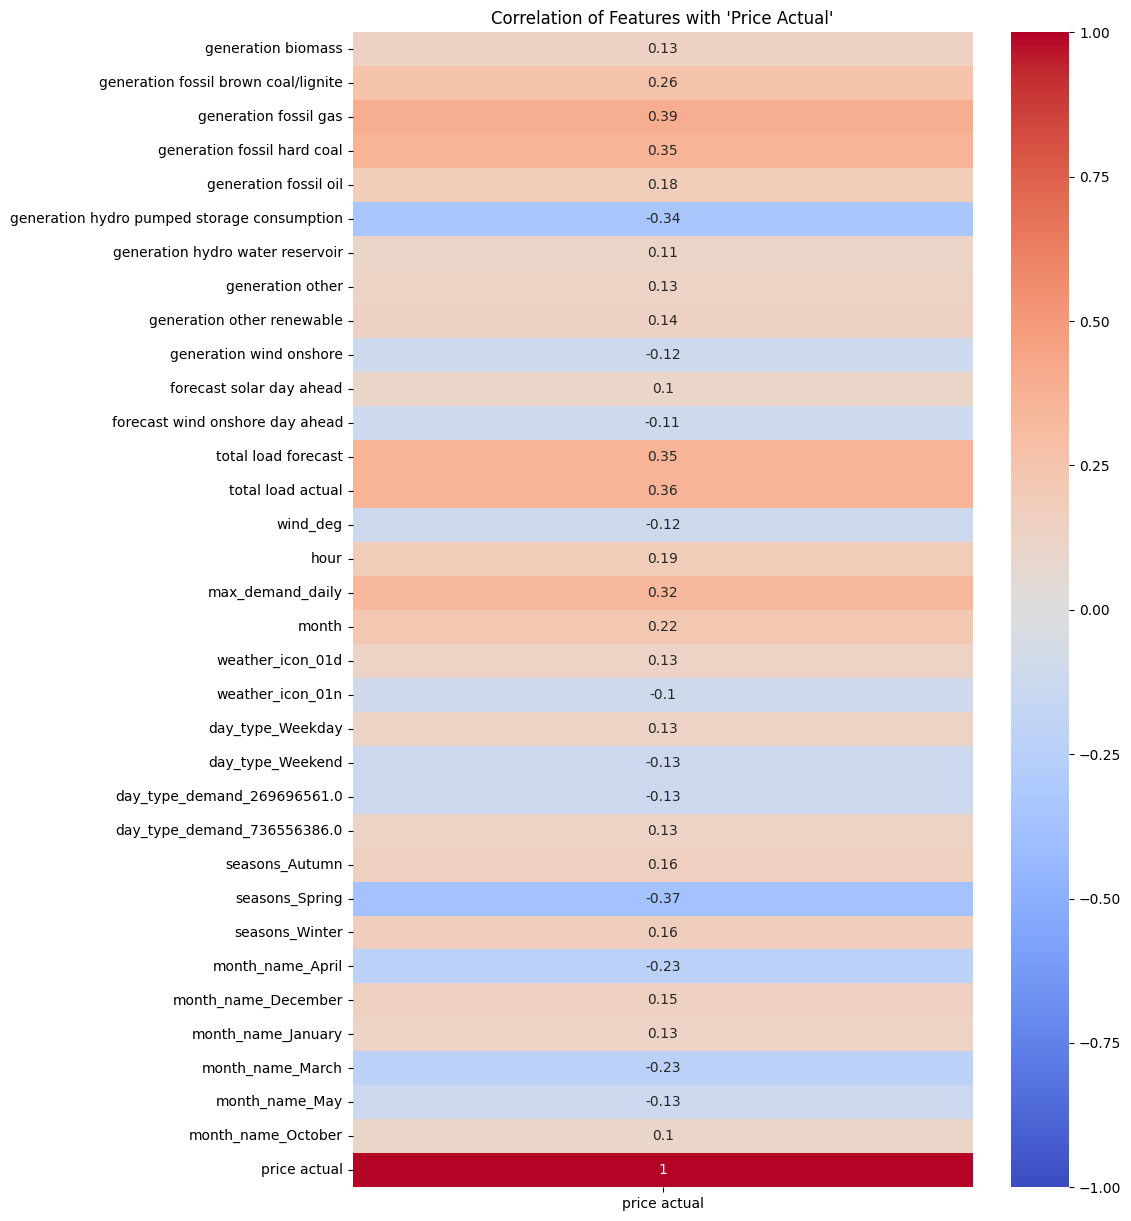

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# List of features to consider for correlation along with the target variable 'price actual'
features = [
    'generation biomass', 'generation fossil brown coal/lignite',
    'generation fossil gas', 'generation fossil hard coal',
    'generation fossil oil', 'generation hydro pumped storage consumption',
    'generation hydro water reservoir', 'generation other',
    'generation other renewable', 'generation wind onshore',
    'forecast solar day ahead', 'forecast wind onshore day ahead',
    'total load forecast', 'total load actual', 'wind_deg', 'hour',
    'max_demand_daily', 'month', 'weather_icon_01d', 'weather_icon_01n',
    'day_type_Weekday', 'day_type_Weekend', 'day_type_demand_269696561.0',
    'day_type_demand_736556386.0', 'seasons_Autumn', 'seasons_Spring',
    'seasons_Winter', 'month_name_April', 'month_name_December',
    'month_name_January', 'month_name_March', 'month_name_May',
    'month_name_October', 'price actual'
]

# Ensure 'encoded_df' contains all specified features
if not set(features).issubset(encoded_df.columns):
    missing_features = set(features) - set(encoded_df.columns)
    raise ValueError(f"The following features are missing from the DataFrame: {missing_features}")

# Calculate the correlation matrix
correlation_matrix = encoded_df[features].corr()

# Extract the correlation values for 'price actual'
correlation_with_price_actual = correlation_matrix[['price actual']]

# Plot the heatmap
plt.figure(figsize=(10, 15))
sns.heatmap(correlation_with_price_actual, annot=True, cmap='coolwarm', cbar=True, vmin=-1, vmax=1)
plt.title("Correlation of Features with 'Price Actual'")
plt.show()




**From the above correlation matrix of the feature set with the target variable 'price actual', we can determine the most important features as 'total load forecast', 'total load actual', 'seasons_Spring' and 'generation fossil gas'**